# Leah Prince

## Hospital Patient Experience

HCAHPS is the first national, standardized, publicly-reported survey of patients' perspectives of hospital care. The survey captures the patients' experience of communication with doctors and nurses, responsiveness of hospital staff, communication about medicines, cleanliness and quietness of the hospital, discharge information, transition to post-hospital care and overall rating of the hospital.The survey is administered between 2 and 42 days after discharge to a random sample of patients, by mail, telephone and interactive voice response. The survey is administered in a variety of languages and over 4,000 hospitals participate in the survey, with over 3 million patients completing the survey each year.

### Data Dictionary

[Data Dictionary](https://hcahpsonline.org/globalassets/hcahps/technical-specifications/2019_technical-specifications_xml-file-specifications-v4.2.pdf)

# Objectives:
Predict hospital patient experience, using one of the most import features, "Nurses Courtesy and Respect - Q01_1". Nurses are on the front lines of health care. They become experts at establishing relationships with patients. A healthly nurse-patient relationship built on trust and respect goes a long way in improving a patient's overall health. Although, this dataset contains an overall rating of patient experience, the overall rating is calculated based on each individual component, being the questions. It is important to understand the uniqueness of each question and how it contributes to the overall experience. Therefore, "Nurses Courtesy and Respect" will be predicted based on a number of feature variables.

1. Exploratory Data Analysis (EDA)
2. Data Cleansing
3. Feature Engineering

## Read in Libraries and File

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-deep')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10,8)

pd.set_option('display.max_columns', None)

Styles Gallery : [Gallery](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html)

In [2]:
patient_data = pd.read_excel('Patient_Experience.xlsx')
patient_data.head()

,WES_HOSPID,FINAL_STATE,FINAL_BEDSIZE,FINAL_OWNERSHIP,FINAL_TEACHING,FINAL_REGION,AGE,Q01_06,Q02_06,Q03_06,Q04_06,Q05_06,Q06_06,Q07_06,Q08_06,Q09_06,Q10_06,Q11_06,Q12_06,Q13_06,Q14_06,Q15_06,Q16_06,Q17_06,Q18_06,Q19_06,Q20_06,Q21_06,Q22_06,Q23_06,Q24_06,Q25_06,Q26A_06,Q26B_06,Q26C_06,Q26D_06,Q26E_06,Q27_06,RECORDID,RACE,FINAL_MODE,SEX,CRITICAL_HOSPITAL,ADMISSIONSOURCE,PRINCIPALREASONADMISSION,PATIENTDISCHARGEDATE,SURVLANG
0,1,AL,4,3,3,5,8.0,4.0,4.0,4.0,3.0,NaN,4.0,4.0,3.0,3.0,2.0,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,2.0,9.0,3.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2,1.0,1,1.0,N,1,2.0,200605,1
1,1,AL,4,3,3,5,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,NaN,1.0,2.0,2.0,1.0,2.0,1.0,1.0,NaN,1.0,5.0,3.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,7,1.0,1,2.0,N,7,2.0,200605,1
2,1,AL,4,3,3,5,7.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,2.0,4.0,2.0,NaN,2.0,NaN,NaN,1.0,2.0,2.0,1.0,1.0,1.0,10.0,4.0,3.0,2.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,10,2.0,1,2.0,N,7,2.0,200605,1
3,1,AL,4,3,3,5,6.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,NaN,1.0,3.0,3.0,2.0,NaN,NaN,1.0,1.0,1.0,9.0,4.0,4.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,13,1.0,1,2.0,N,7,2.0,200605,1
4,1,AL,4,3,3,5,8.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,NaN,1.0,2.0,3.0,1.0,4.0,1.0,1.0,NaN,NaN,8.0,4.0,3.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,16,2.0,1,1.0,N,7,2.0,200605,1


In [3]:
patient_data.tail()

,WES_HOSPID,FINAL_STATE,FINAL_BEDSIZE,FINAL_OWNERSHIP,FINAL_TEACHING,FINAL_REGION,AGE,Q01_06,Q02_06,Q03_06,Q04_06,Q05_06,Q06_06,Q07_06,Q08_06,Q09_06,Q10_06,Q11_06,Q12_06,Q13_06,Q14_06,Q15_06,Q16_06,Q17_06,Q18_06,Q19_06,Q20_06,Q21_06,Q22_06,Q23_06,Q24_06,Q25_06,Q26A_06,Q26B_06,Q26C_06,Q26D_06,Q26E_06,Q27_06,RECORDID,RACE,FINAL_MODE,SEX,CRITICAL_HOSPITAL,ADMISSIONSOURCE,PRINCIPALREASONADMISSION,PATIENTDISCHARGEDATE,SURVLANG
190685,935,CA,4,2,3,9,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,4.0,1.0,4.0,4.0,2.0,NaN,NaN,1.0,1.0,1.0,10.0,4.0,1.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,564055,1.0,1,2.0,N,9,2.0,200601,1
190686,935,CA,4,2,3,9,5.0,3.0,3.0,4.0,1.0,4.0,4.0,4.0,4.0,3.0,2.0,NaN,1.0,3.0,4.0,2.0,NaN,NaN,1.0,2.0,1.0,10.0,4.0,2.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,564057,1.0,1,2.0,N,1,3.0,200601,1
190687,935,CA,4,2,3,9,8.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,NaN,1.0,4.0,4.0,1.0,4.0,4.0,1.0,1.0,1.0,10.0,4.0,1.0,6.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,564059,1.0,1,2.0,N,1,3.0,200601,1
190688,935,CA,4,2,3,9,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,2.0,1.0,10.0,4.0,2.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,2.0,564060,NaN,1,2.0,N,1,1.0,200601,2
190689,935,CA,4,2,3,9,1.0,3.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,3.0,2.0,NaN,2.0,NaN,NaN,1.0,4.0,4.0,1.0,2.0,1.0,9.0,3.0,3.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,1.0,564064,NaN,1,2.0,N,1,1.0,200601,1


# EDA

### Get information on rows and columns

In [4]:
patient_data.shape

(190690, 47)

In [5]:
print ("The number of columns is: ", patient_data.shape[1])

The number of columns is:  47


In [6]:
print ("The number of rows is: ", patient_data.shape[0])

The number of rows is:  190690


In [7]:
patient_data.columns

Index(['WES_HOSPID', 'FINAL_STATE', 'FINAL_BEDSIZE', 'FINAL_OWNERSHIP',
       'FINAL_TEACHING', 'FINAL_REGION', 'AGE', 'Q01_06', 'Q02_06', 'Q03_06',
       'Q04_06', 'Q05_06', 'Q06_06', 'Q07_06', 'Q08_06', 'Q09_06', 'Q10_06',
       'Q11_06', 'Q12_06', 'Q13_06', 'Q14_06', 'Q15_06', 'Q16_06', 'Q17_06',
       'Q18_06', 'Q19_06', 'Q20_06', 'Q21_06', 'Q22_06', 'Q23_06', 'Q24_06',
       'Q25_06', 'Q26A_06', 'Q26B_06', 'Q26C_06', 'Q26D_06', 'Q26E_06',
       'Q27_06', 'RECORDID', 'RACE', 'FINAL_MODE', 'SEX', 'CRITICAL_HOSPITAL',
       'ADMISSIONSOURCE', 'PRINCIPALREASONADMISSION', 'PATIENTDISCHARGEDATE',
       'SURVLANG'],
      dtype='object')

### Get information on data types

In [8]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190690 entries, 0 to 190689
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   WES_HOSPID                190690 non-null  int64  
 1   FINAL_STATE               190690 non-null  object 
 2   FINAL_BEDSIZE             190690 non-null  int64  
 3   FINAL_OWNERSHIP           190690 non-null  int64  
 4   FINAL_TEACHING            190690 non-null  int64  
 5   FINAL_REGION              190690 non-null  int64  
 6   AGE                       187713 non-null  float64
 7   Q01_06                    188999 non-null  float64
 8   Q02_06                    188678 non-null  float64
 9   Q03_06                    187987 non-null  float64
 10  Q04_06                    184632 non-null  float64
 11  Q05_06                    187809 non-null  float64
 12  Q06_06                    187207 non-null  float64
 13  Q07_06                    187117 non-null  f

In [9]:
type(patient_data)

pandas.core.frame.DataFrame

### Determine Missing Values

In [10]:
missing_values = patient_data.isnull().sum()
missing_values

WES_HOSPID                      0
FINAL_STATE                     0
FINAL_BEDSIZE                   0
FINAL_OWNERSHIP                 0
FINAL_TEACHING                  0
FINAL_REGION                    0
AGE                          2977
Q01_06                       1691
Q02_06                       2012
Q03_06                       2703
Q04_06                       6058
Q05_06                       2881
Q06_06                       3483
Q07_06                       3573
Q08_06                       4366
Q09_06                       3836
Q10_06                       9007
Q11_06                      97915
Q12_06                       6964
Q13_06                      58491
Q14_06                      58310
Q15_06                      12895
Q16_06                      86753
Q17_06                      88525
Q18_06                       3649
Q19_06                      26049
Q20_06                      29786
Q21_06                       4014
Q22_06                       4322
Q23_06        

In [11]:
#get percent of missing values
(missing_values/len(patient_data)*100).round(2)

WES_HOSPID                   0.00
FINAL_STATE                  0.00
FINAL_BEDSIZE                0.00
FINAL_OWNERSHIP              0.00
FINAL_TEACHING               0.00
FINAL_REGION                 0.00
AGE                          1.56
Q01_06                       0.89
Q02_06                       1.06
Q03_06                       1.42
Q04_06                       3.18
Q05_06                       1.51
Q06_06                       1.83
Q07_06                       1.87
Q08_06                       2.29
Q09_06                       2.01
Q10_06                       4.72
Q11_06                      51.35
Q12_06                       3.65
Q13_06                      30.67
Q14_06                      30.58
Q15_06                       6.76
Q16_06                      45.49
Q17_06                      46.42
Q18_06                       1.91
Q19_06                      13.66
Q20_06                      15.62
Q21_06                       2.10
Q22_06                       2.27
Q23_06        

### Summary Stats on Age
Note: Ages are grouped into bins (1-15)

In [12]:
patient_data["AGE"].value_counts()

12.0    20071
11.0    18667
10.0    17419
13.0    16844
9.0     14834
8.0     13926
2.0     11890
7.0     11584
1.0     11405
3.0     11165
6.0      9625
14.0     9594
4.0      8693
5.0      7792
15.0     4204
Name: AGE, dtype: int64

In [13]:
patient_data["AGE"].value_counts(normalize=True)*100

12.0    10.692387
11.0     9.944436
10.0     9.279592
13.0     8.973273
9.0      7.902489
8.0      7.418772
2.0      6.334138
7.0      6.171123
1.0      6.075765
3.0      5.947910
6.0      5.127508
14.0     5.110994
4.0      4.631006
5.0      4.151018
15.0     2.239589
Name: AGE, dtype: float64

In [14]:
10.69+9.94+9.27+8.97

38.87

39% of patients are between the ages of 65 and 84.

In [15]:
patient_data.groupby(['AGE']).SEX.value_counts()

AGE   SEX
1.0   2.0    10397
      1.0      986
2.0   2.0    11039
      1.0      831
3.0   2.0    10131
      1.0     1009
4.0   2.0     7187
      1.0     1490
5.0   2.0     5367
      1.0     2409
6.0   2.0     6061
      1.0     3547
7.0   2.0     6713
      1.0     4842
8.0   2.0     7715
      1.0     6179
9.0   2.0     7917
      1.0     6878
10.0  2.0     9253
      1.0     8119
11.0  2.0    10004
      1.0     8612
12.0  2.0    10995
      1.0     9010
13.0  2.0     9708
      1.0     7074
14.0  2.0     5844
      1.0     3711
15.0  2.0     2897
      1.0     1300
Name: SEX, dtype: int64

There are more females in age group 2 (25-29) compared to any other group.

### Summary Stats on Race

In [16]:
patient_data["RACE"].unique()

array([ 1.,  2.,  6., nan,  5.,  3.,  4.])

In [17]:
patient_data["RACE"].value_counts()

1.0    146197
2.0     14570
3.0      6326
6.0      3109
5.0      1863
4.0       792
Name: RACE, dtype: int64

In [18]:
patient_data["RACE"].value_counts(normalize=True)*100

1.0    84.576847
2.0     8.428933
3.0     3.659672
6.0     1.798597
5.0     1.077769
4.0     0.458182
Name: RACE, dtype: float64

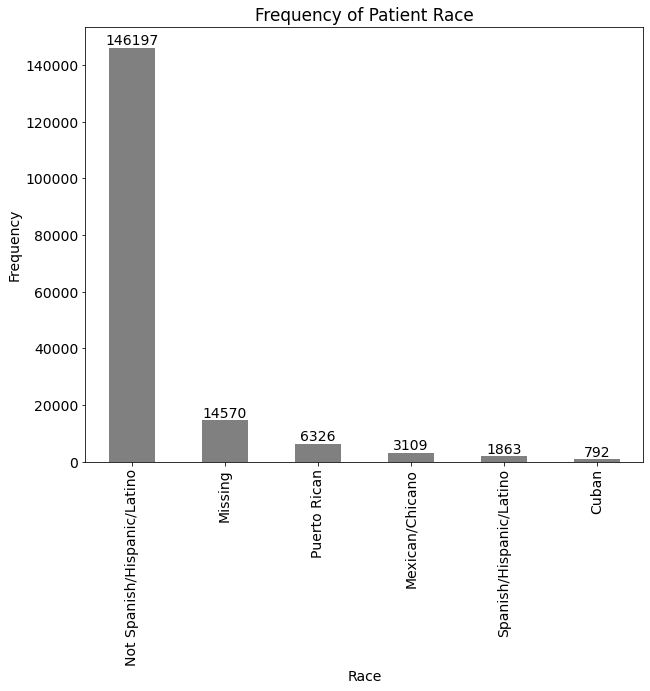

In [19]:
patient_data["RACE"].value_counts().plot(kind='bar', grid=False, color = 'gray');
plt.title('Frequency of Patient Race');
positions = (0,1,2,3,4,5)
labels = ('Not Spanish/Hispanic/Latino','Missing', 'Puerto Rican','Mexican/Chicano','Spanish/Hispanic/Latino','Cuban');
plt.xticks(positions, labels);
plt.xlabel('Race');
plt.ylabel('Frequency');


#add data value labels to bars, i: pass x and y coordinates, y[i]: height and string,
#ha:set horizontal alignment, va:set verticle alignment
y=[146197, 14570, 6326, 3109, 1863, 792]
for i in range(len(positions)):
    plt.text(i, y[i], y[i], ha='center', va='bottom')

85% of patients are Race 1 (not spanish/hispanic/latino), which means they are some other race.

In [20]:
patient_data.groupby(['RACE']).SEX.value_counts()

RACE  SEX
1.0   2.0    91711
      1.0    54056
2.0   2.0    10257
      1.0     4277
3.0   2.0     4383
      1.0     1942
4.0   2.0      562
      1.0      230
5.0   2.0     1183
      1.0      677
6.0   2.0     1992
      1.0     1113
Name: SEX, dtype: int64

Females account for the majority of respondents in race 1 (not hispanic/spanish/latino).

### Summary Stats on Sex

In [21]:
patient_data["SEX"].value_counts()

2.0    123090
1.0     67112
Name: SEX, dtype: int64

In [22]:
patient_data["SEX"].value_counts(normalize=True)*100

2.0    64.715408
1.0    35.284592
Name: SEX, dtype: float64

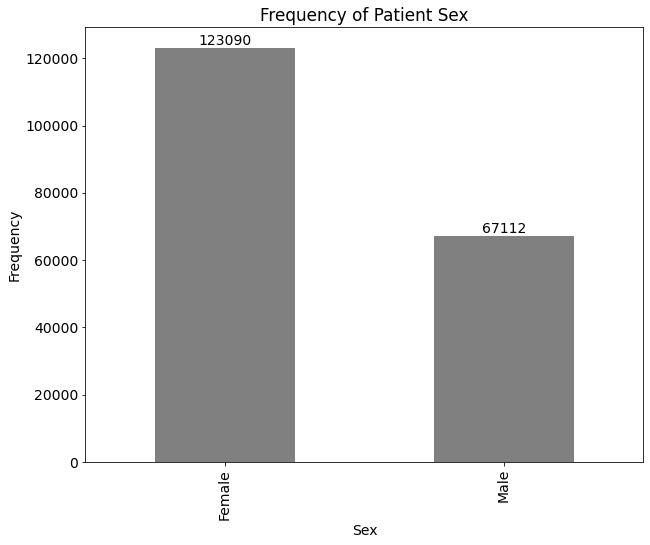

In [23]:
patient_data["SEX"].value_counts().plot(kind='bar', grid=False, color = 'gray');
plt.title('Frequency of Patient Sex');
positions = (0,1)
labels = ('Female', 'Male');
plt.xticks(positions, labels);
plt.xlabel('Sex');
plt.ylabel('Frequency');

#add data value labels to bars, i: pass x and y coordinates, y[i]: height and string,
#ha:set horizontal alignment, va:set verticle alignment
y=[123090, 67112]
for i in range(len(positions)):
    plt.text(i, y[i], y[i], ha='center', va='bottom')

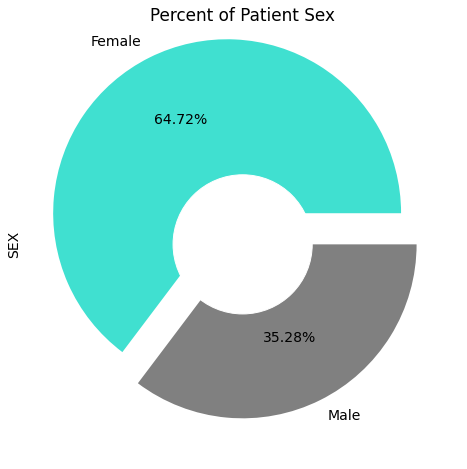

In [24]:
labels = ['Female', 'Male']
colors = ['turquoise', 'gray']
explode = [0.2,0]
patient_data["SEX"].value_counts().plot(kind='pie', labels=labels, colors = colors, autopct='%2.2f%%', explode=explode);
plt.title('Percent of Patient Sex');
#create the center of the donut chart
my_circle = plt.Circle((0,0), 0.4, color='white');
#get the current figure
p=plt.gcf();
#get the current axis and add the circle to the axis
p.gca().add_artist(my_circle);

There's nearly half as many females (2), as there are males.

In [25]:
patient_data.groupby(['SEX']).PRINCIPALREASONADMISSION.value_counts()

SEX  PRINCIPALREASONADMISSION
1.0  2.0                         29449
     3.0                         20347
     1.0                            39
2.0  2.0                         39838
     3.0                         27995
     1.0                         22568
Name: PRINCIPALREASONADMISSION, dtype: int64

39 male respondents were admitted for maternity care.

### Summary Stats on Critical Hospital

In [26]:
patient_data["CRITICAL_HOSPITAL"].value_counts()

N    185905
Y      4785
Name: CRITICAL_HOSPITAL, dtype: int64

In [27]:
crit_hosp = patient_data["CRITICAL_HOSPITAL"].value_counts(normalize=True)*100
crit_hosp

N    97.490692
Y     2.509308
Name: CRITICAL_HOSPITAL, dtype: float64

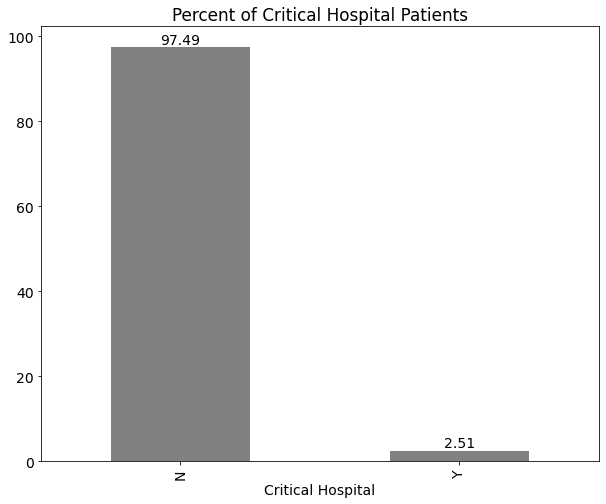

In [28]:
crit_hosp.plot(kind='bar', grid=False, color='gray');
plt.title('Percent of Critical Hospital Patients');
plt.xlabel('Critical Hospital');
positions = [0,1]


#add data value labels to bars, i: pass x and y coordinates, y[i]: height and string,
#ha:set horizontal alignment, va:set verticle alignment
y=[97.49,2.51]
for i in range(len(positions)):
    plt.text(i, y[i], y[i], ha='center', va='bottom')

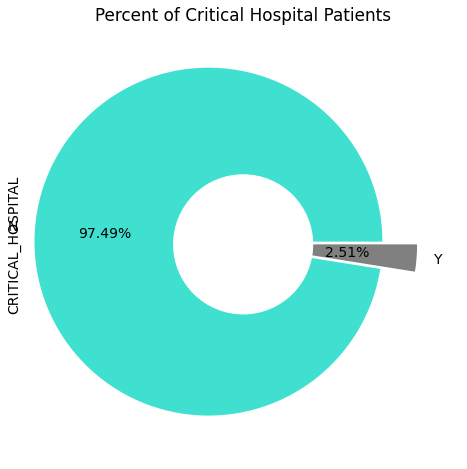

In [29]:
colors = ['turquoise', 'gray']
explode = [0.2,0]
patient_data["CRITICAL_HOSPITAL"].value_counts(normalize=True).plot(kind='pie', colors = colors, 
                                                                    autopct='%2.2f%%', explode=explode);
plt.title('Percent of Critical Hospital Patients');
#create the center of the donut chart
my_circle = plt.Circle((0,0), 0.4, color='white');
#get the current figure
p=plt.gcf();
#get the current axis and add the circle to the axis
p.gca().add_artist(my_circle);

97% of the sample patient population did not need critical care.

In [30]:
patient_data.groupby(['CRITICAL_HOSPITAL']).SEX.value_counts()

CRITICAL_HOSPITAL  SEX
N                  2.0    119899
                   1.0     65518
Y                  2.0      3191
                   1.0      1594
Name: SEX, dtype: int64

### Summary Stats on Admission Source

In [31]:
patient_data["ADMISSIONSOURCE"].unique()

array(['1', '7', '6', '2', '5', '4', '9', 'A', '3', '8'], dtype=object)

In [32]:
patient_data["ADMISSIONSOURCE"].value_counts()

1    73109
9    54635
7    54218
2     3647
4     3448
6      584
3      574
5      336
8       72
A       67
Name: ADMISSIONSOURCE, dtype: int64

In [33]:
patient_data["ADMISSIONSOURCE"].value_counts(normalize=True)*100

1    38.339189
9    28.651214
7    28.432534
2     1.912528
4     1.808170
6     0.306256
3     0.301012
5     0.176202
8     0.037758
A     0.035136
Name: ADMISSIONSOURCE, dtype: float64

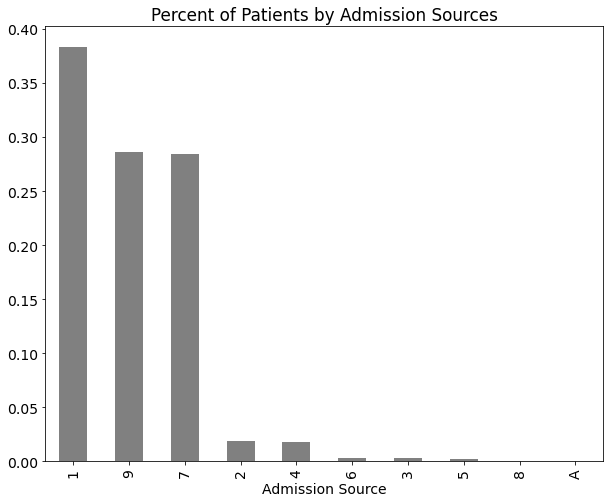

In [34]:
patient_data["ADMISSIONSOURCE"].value_counts(normalize=True).plot(kind='bar', grid=False, color = 'gray');
plt.title('Percent of Patients by Admission Sources');
plt.xlabel('Admission Source');
#The admission source codes don't fully match up with the data dictionary

Most patients were admitted through admission source 1, which is a Non-HealthCare Facility

In [35]:
patient_data.groupby(['ADMISSIONSOURCE']).PRINCIPALREASONADMISSION.value_counts()

ADMISSIONSOURCE  PRINCIPALREASONADMISSION
1                3.0                         31583
                 1.0                         18719
                 2.0                         17753
2                3.0                          1643
                 2.0                          1003
                 1.0                           657
3                3.0                           275
                 1.0                           164
                 2.0                            94
4                2.0                          2016
                 3.0                          1040
                 1.0                            40
5                2.0                           227
                 3.0                            63
                 1.0                            16
6                2.0                           338
                 3.0                           170
                 1.0                            37
7                2.0                    

### Summary Stats on Final State

In [36]:
patient_data['FINAL_STATE'].value_counts()

CA    69263
FL    17328
TX    12289
OH     7963
PA     7679
GA     7077
VA     4003
CO     3785
NC     3724
MS     3684
MI     3523
TN     3467
SC     3421
WI     3217
ME     2946
NY     2909
UT     2903
IN     2492
MO     2259
AZ     2001
AL     1773
KY     1723
ID     1709
LA     1650
IA     1649
IL     1533
MT     1459
OK     1417
WA     1342
NE     1087
NV     1037
OR     1013
KS     1009
WV      986
MA      786
NJ      684
WY      594
AR      585
ND      466
NH      439
MN      326
MD      292
AK      255
VT      219
NM      200
DE      193
HI      171
DC      102
CT       29
SD       29
Name: FINAL_STATE, dtype: int64

In [37]:
patient_data['FINAL_STATE'].value_counts(normalize=True)*100

CA    36.322303
FL     9.087000
TX     6.444491
OH     4.175888
PA     4.026955
GA     3.711259
VA     2.099219
CO     1.984897
NC     1.952908
MS     1.931931
MI     1.847501
TN     1.818134
SC     1.794011
WI     1.687031
ME     1.544916
NY     1.525513
UT     1.522366
IN     1.306833
MO     1.184645
AZ     1.049347
AL     0.929781
KY     0.903561
ID     0.896219
LA     0.865279
IA     0.864754
IL     0.803923
MT     0.765116
OK     0.743091
WA     0.703760
NE     0.570035
NV     0.543815
OR     0.531229
KS     0.529131
WV     0.517070
MA     0.412187
NJ     0.358697
WY     0.311500
AR     0.306781
ND     0.244376
NH     0.230217
MN     0.170958
MD     0.153128
AK     0.133725
VT     0.114846
NM     0.104882
DE     0.101211
HI     0.089674
DC     0.053490
CT     0.015208
SD     0.015208
Name: FINAL_STATE, dtype: float64

California had the most number of survey respondents out of any other state.

### Summary Stats on Principal Reason Admission

In [38]:
patient_data['PRINCIPALREASONADMISSION'].unique()

array([ 2.,  3.,  1., nan])

In [39]:
patient_data['PRINCIPALREASONADMISSION'].value_counts()

2.0    69561
3.0    48500
1.0    22661
Name: PRINCIPALREASONADMISSION, dtype: int64

In [40]:
patient_data['PRINCIPALREASONADMISSION'].value_counts(normalize=True)*100

2.0    49.431503
3.0    34.465116
1.0    16.103381
Name: PRINCIPALREASONADMISSION, dtype: float64

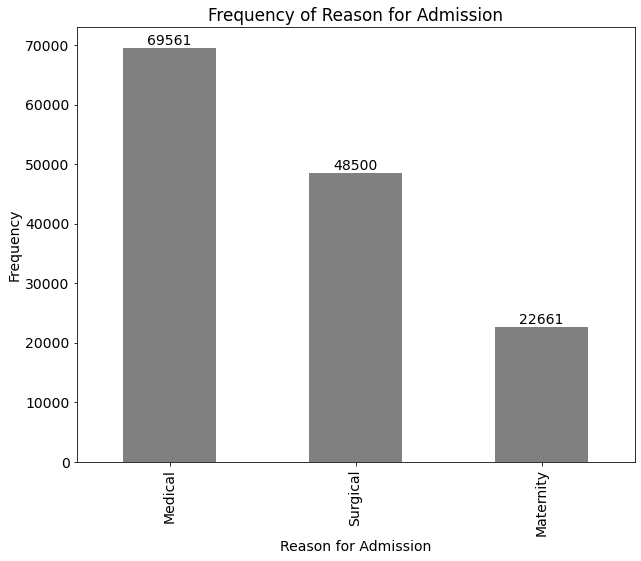

In [41]:
patient_data['PRINCIPALREASONADMISSION'].value_counts().plot(kind='bar',  color = 'gray');
plt.title('Frequency of Reason for Admission');
positions = (0,1,2)
labels = ('Medical', 'Surgical','Maternity');
plt.xticks(positions, labels);
plt.xlabel('Reason for Admission');
plt.ylabel('Frequency');

#add data value labels to bars, i: pass x and y coordinates, y[i]: height and string,
#ha:set horizontal alignment, va:set verticle alignment
y=[69561, 48500, 22661]
for i in range(len(positions)):
    plt.text(i, y[i], y[i], ha='center', va='bottom')

Medical needs were the number one reason for admission and accounted for 50% of admissions.

### Summary Stats on Final Mode

In [42]:
patient_data['FINAL_MODE'].unique()

array([1, 2, 3], dtype=int64)

In [43]:
patient_data['FINAL_MODE'].value_counts()

1    148210
2     36822
3      5658
Name: FINAL_MODE, dtype: int64

In [44]:
final_mode = patient_data['FINAL_MODE'].value_counts(normalize=True)*100

In [45]:
final_mode

1    77.723006
2    19.309875
3     2.967119
Name: FINAL_MODE, dtype: float64

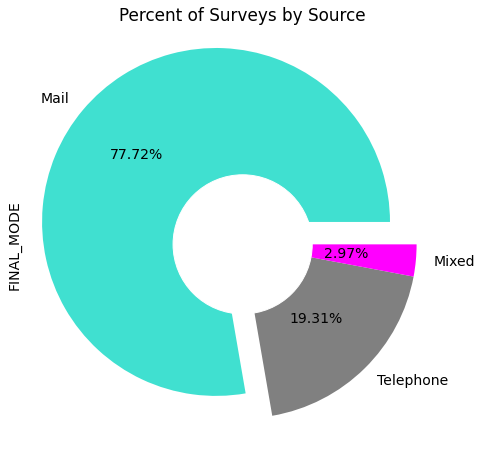

In [46]:
labels = ['Mail', 'Telephone', 'Mixed']
colors = ['turquoise', 'gray', 'magenta']
explode = [0.2,0,0]
final_mode.plot(kind='pie', colors=colors, labels=labels, autopct='%2.2f%%', explode=explode);
plt.title('Percent of Surveys by Source');
#create the center of the donut chart
my_circle = plt.Circle((0,0), 0.4, color='white');
#get the current figure
p=plt.gcf();
#get the current axis and add the circle to the axis
p.gca().add_artist(my_circle);

The majority of surveys were submitted by mail (1), which accounted for 77% of submissions by source.

### Summary Stats on Patient Discharge Date
Note: Dates are reflected as year and month

In [47]:
patient_data['PATIENTDISCHARGEDATE'].value_counts(normalize=True)*100

200606    15.438146
200605    13.686087
200609    11.517122
200608    11.408044
200607    11.294772
200602     9.702659
200604     9.697939
200601     8.151450
200512     6.990403
200603     2.113378
Name: PATIENTDISCHARGEDATE, dtype: float64

Most survey activity occured in May and June of 2006.

In [48]:
patient_data.groupby(['PATIENTDISCHARGEDATE']).SEX.value_counts()

PATIENTDISCHARGEDATE  SEX
200512                2.0     8391
                      1.0     4939
200601                2.0    10099
                      1.0     5445
200602                2.0    11831
                      1.0     6671
200603                2.0     2695
                      1.0     1335
200604                2.0    12019
                      1.0     6445
200605                2.0    16947
                      1.0     8909
200606                2.0    19142
                      1.0    10095
200607                2.0    13946
                      1.0     7586
200608                2.0    13963
                      1.0     7783
200609                2.0    14057
                      1.0     7904
Name: SEX, dtype: int64

In [49]:
patient_data.groupby(['PATIENTDISCHARGEDATE']).PRINCIPALREASONADMISSION.value_counts()

PATIENTDISCHARGEDATE  PRINCIPALREASONADMISSION
200512                2.0                          4997
                      3.0                          3231
                      1.0                          1707
200601                2.0                          5842
                      3.0                          3928
                      1.0                          2107
200602                2.0                          6002
                      3.0                          4413
                      1.0                          2291
200603                2.0                           413
                      3.0                           356
                      1.0                           180
200604                2.0                          7356
                      3.0                          4544
                      1.0                          2078
200605                2.0                         10465
                      3.0                          7257
 

### Summary Stats on Survey Language

In [50]:
patient_data['SURVLANG'].unique()

array([1, 2, 3, 8], dtype=int64)

In [51]:
patient_data['SURVLANG'].value_counts()

1    183280
2      7274
8       112
3        24
Name: SURVLANG, dtype: int64

In [52]:
surv_lang = patient_data['SURVLANG'].value_counts(normalize=True)*100

In [53]:
surv_lang

1    96.114112
2     3.814568
8     0.058734
3     0.012586
Name: SURVLANG, dtype: float64

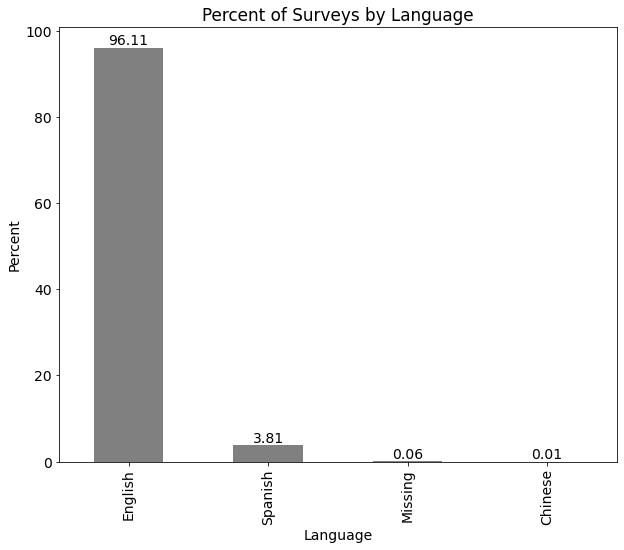

In [54]:
surv_lang.plot(kind='bar',  color = 'gray');
plt.title('Percent of Surveys by Language');
positions = (0,1,2,3)
labels = ('English', 'Spanish','Missing', 'Chinese');
plt.xticks(positions, labels);
plt.xlabel('Language');
plt.ylabel('Percent');
#data dictionary does not fully match language codes

#add data value labels to bars, i: pass x and y coordinates, y[i]: height and string,
#ha:set horizontal alignment, va:set verticle alignment
y=[96.11, 3.81, 0.06, 0.01]
for i in range(len(positions)):
    plt.text(i, y[i], y[i], ha='center', va='bottom')

The majority of survey respondents spoke English(1).

### Q01_06

In [55]:
patient_data['Q01_06'].unique()

array([ 4.,  2.,  3.,  1., nan])

In [56]:
Q01 = patient_data['Q01_06'].value_counts(normalize=True)*100
Q01

4.0    76.650670
3.0    17.819671
2.0     5.062990
1.0     0.466669
Name: Q01_06, dtype: float64

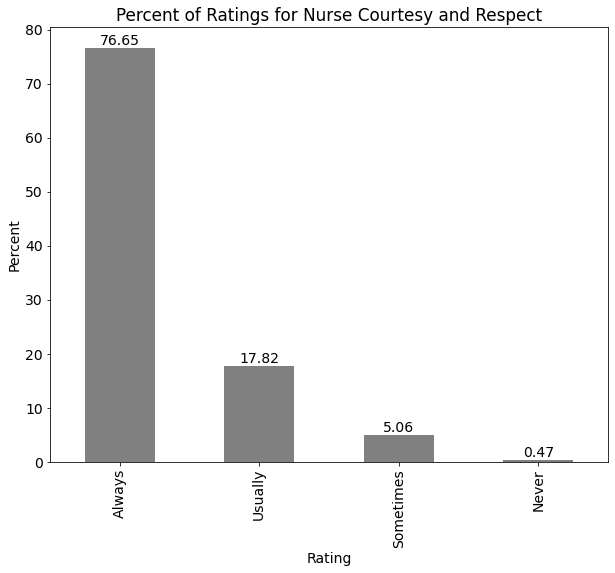

In [57]:
Q01.plot(kind='bar',  color = 'gray');
plt.title('Percent of Ratings for Nurse Courtesy and Respect');
positions = (0,1,2,3)
labels = ('Always', 'Usually', 'Sometimes', 'Never');
plt.xticks(positions, labels);
plt.xlabel('Rating');
plt.ylabel('Percent');

#add data value labels to bars, i: pass x and y coordinates, y[i]: height and string,
#ha:set horizontal alignment, va:set verticle alignment
y=[76.65,17.82,5.06,0.47]
for i in range(len(positions)):
    plt.text(i, y[i], y[i], ha='center', va='bottom')

77% of respondents rated nurses with a 4 rating for courtesy and respect.

### Q02_06

In [58]:
patient_data['Q02_06'].unique()

array([ 4.,  2.,  3.,  1., nan])

In [59]:
Q02 = patient_data['Q02_06'].value_counts(normalize=True)*100
Q02

4.0    64.726677
3.0    26.408484
2.0     7.775681
1.0     1.089157
Name: Q02_06, dtype: float64

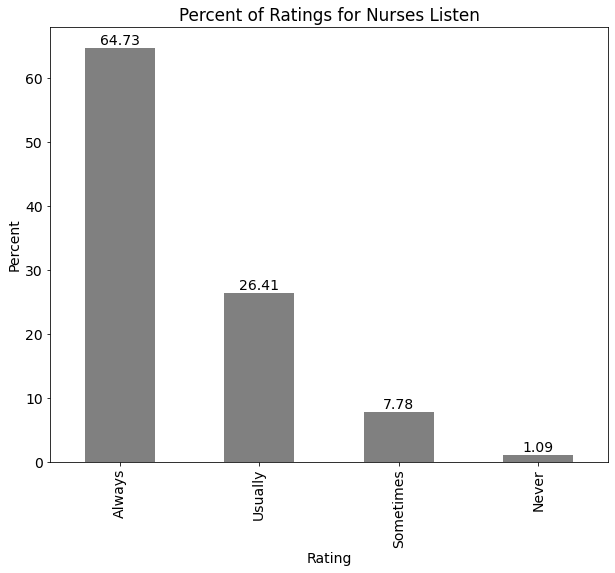

In [60]:
Q02.plot(kind='bar',  color = 'gray');
plt.title('Percent of Ratings for Nurses Listen');
positions = (0,1,2,3)
labels = ('Always', 'Usually', 'Sometimes', 'Never');
plt.xticks(positions, labels);
plt.xlabel('Rating');
plt.ylabel('Percent');

#add data value labels to bars, i: pass x and y coordinates, y[i]: height and string,
#ha:set horizontal alignment, va:set verticle alignment
y=[64.73,26.41,7.78,1.09]
for i in range(len(positions)):
    plt.text(i, y[i], y[i], ha='center', va='bottom')

65% of respondents rated nurses with a 4 rating for listening skills.

### Q03_06

In [61]:
patient_data['Q03_06'].unique()

array([ 4.,  2.,  3.,  1., nan])

In [62]:
Q03 = patient_data['Q03_06'].value_counts(normalize=True)*100
Q03

4.0    65.300792
3.0    24.948002
2.0     7.871289
1.0     1.879917
Name: Q03_06, dtype: float64

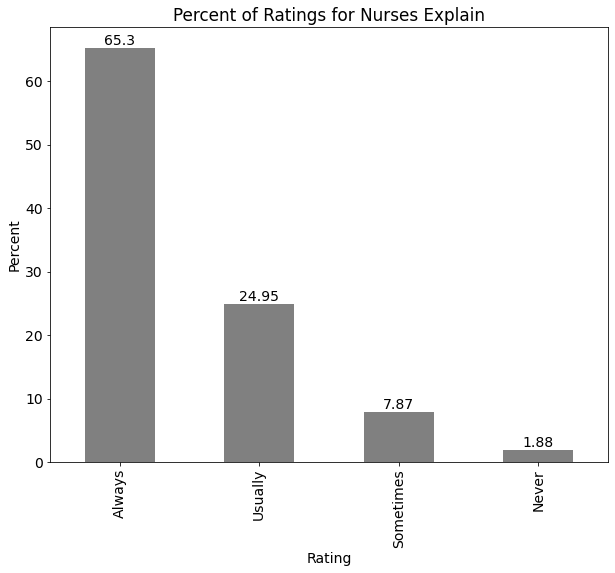

In [63]:
Q03.plot(kind='bar',  color = 'gray');
plt.title('Percent of Ratings for Nurses Explain');
positions = (0,1,2,3)
labels = ('Always', 'Usually', 'Sometimes', 'Never');
plt.xticks(positions, labels);
plt.xlabel('Rating');
plt.ylabel('Percent');


#add data value labels to bars, i: pass x and y coordinates, y[i]: height and string,
#ha:set horizontal alignment, va:set verticle alignment
y=[65.30,24.95,7.87,1.88]
for i in range(len(positions)):
    plt.text(i, y[i], y[i], ha='center', va='bottom')

65% of respondents rated nurses with a 4 rating for explaining.

### Q05_06

In [64]:
patient_data['Q05_06'].unique()

array([nan,  2.,  4.,  3.,  1.])

In [65]:
Q05 = patient_data['Q05_06'].value_counts(normalize=True)*100
Q05

4.0    83.944859
3.0    12.103254
2.0     3.164918
1.0     0.786970
Name: Q05_06, dtype: float64

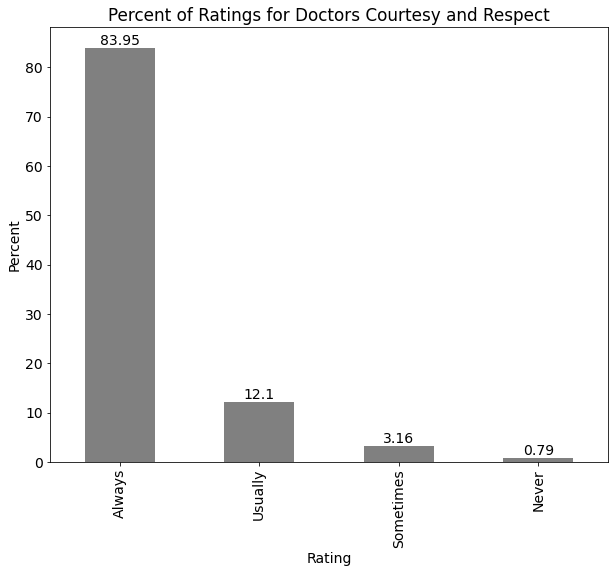

In [66]:
Q05.plot(kind='bar',  color = 'gray');
plt.title('Percent of Ratings for Doctors Courtesy and Respect');
positions = (0,1,2,3)
labels = ('Always', 'Usually', 'Sometimes', 'Never');
plt.xticks(positions, labels);
plt.xlabel('Rating');
plt.ylabel('Percent');


#add data value labels to bars, i: pass x and y coordinates, y[i]: height and string,
#ha:set horizontal alignment, va:set verticle alignment
y=[83.95,12.10,3.16,0.79]
for i in range(len(positions)):
    plt.text(i, y[i], y[i], ha='center', va='bottom')

84% of respondents rated doctors with a 4 for courtesy and respect.

### Q06_06

In [67]:
patient_data['Q06_06'].unique()

array([ 4.,  2.,  3.,  1., nan])

In [68]:
Q06 = patient_data['Q06_06'].value_counts(normalize=True)*100
Q06

4.0    75.011084
3.0    18.346002
2.0     5.243928
1.0     1.398986
Name: Q06_06, dtype: float64

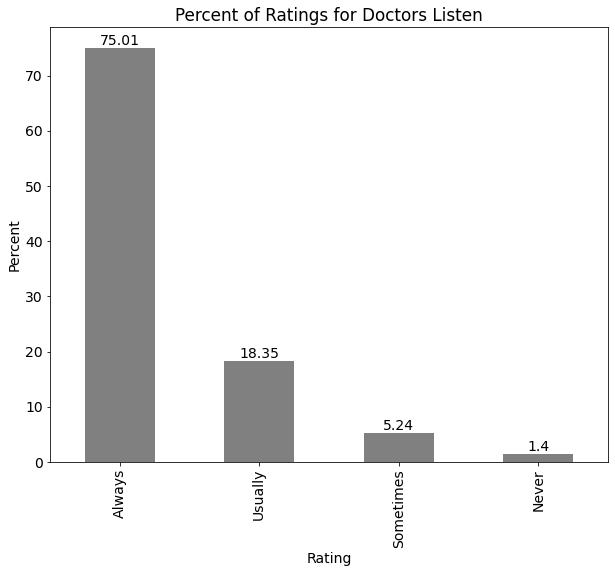

In [69]:
Q06.plot(kind='bar',  color = 'gray');
plt.title('Percent of Ratings for Doctors Listen');
positions = (0,1,2,3)
labels = ('Always', 'Usually', 'Sometimes', 'Never');
plt.xticks(positions, labels);
plt.xlabel('Rating');
plt.ylabel('Percent');


#add data value labels to bars, i: pass x and y coordinates, y[i]: height and string,
#ha:set horizontal alignment, va:set verticle alignment
y=[75.01,18.35,5.24,1.40]
for i in range(len(positions)):
    plt.text(i, y[i], y[i], ha='center', va='bottom')

75% of respondents rated doctors with a 4 rating for listening skills.

### Q07_06

In [70]:
patient_data['Q07_06'].unique()

array([ 4.,  2.,  3.,  1., nan])

In [71]:
Q07 = patient_data['Q07_06'].value_counts(normalize=True)*100
Q07

4.0    71.537060
3.0    20.798217
2.0     5.972199
1.0     1.692524
Name: Q07_06, dtype: float64

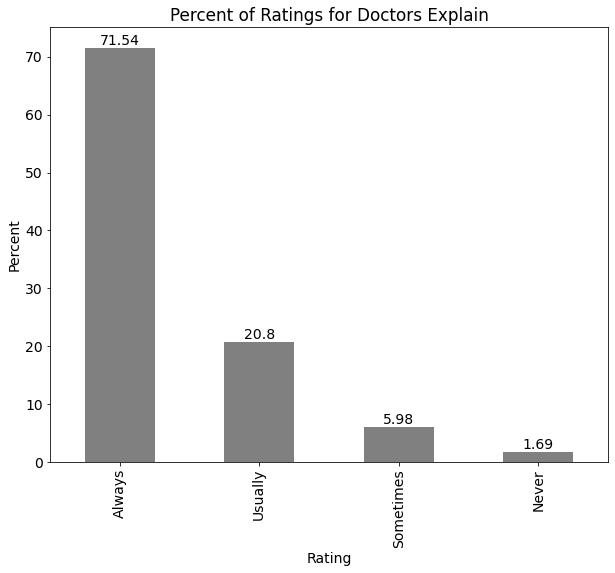

In [72]:
Q07.plot(kind='bar',  color = 'gray');
plt.title('Percent of Ratings for Doctors Explain');
positions = (0,1,2,3)
labels = ('Always', 'Usually', 'Sometimes', 'Never');
plt.xticks(positions, labels);
plt.xlabel('Rating');
plt.ylabel('Percent');


#add data value labels to bars, i: pass x and y coordinates, y[i]: height and string,
#ha:set horizontal alignment, va:set verticle alignment
y=[71.54,20.80,5.98,1.69]
for i in range(len(positions)):
    plt.text(i, y[i], y[i], ha='center', va='bottom')

71% of respondents rated doctors with a 4 rating for explaining.

### Q08_06

In [73]:
patient_data['Q08_06'].unique()

array([ 3.,  2.,  4.,  1., nan])

In [74]:
Q08 = patient_data['Q08_06'].value_counts(normalize=True)*100
Q08

4.0    64.854769
3.0    22.405058
2.0     9.803890
1.0     2.936283
Name: Q08_06, dtype: float64

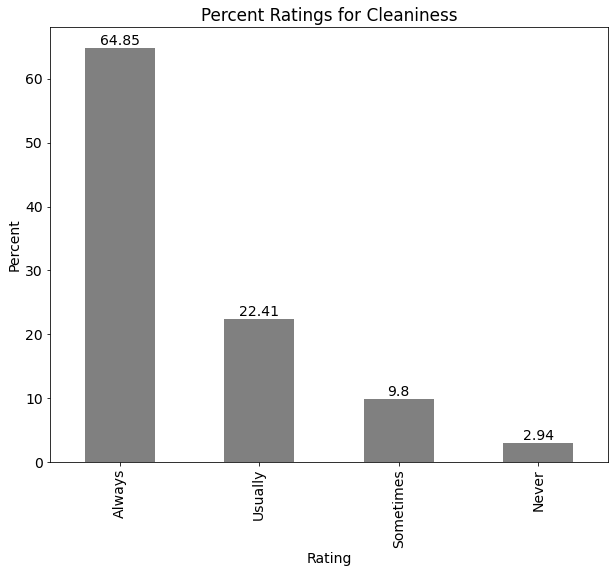

In [75]:
Q08.plot(kind='bar',  color = 'gray');
plt.title('Percent Ratings for Cleaniness');
positions = (0,1,2,3)
labels = ('Always', 'Usually', 'Sometimes', 'Never');
plt.xticks(positions, labels);
plt.xlabel('Rating');
plt.ylabel('Percent');


#add data value labels to bars, i: pass x and y coordinates, y[i]: height and string,
#ha:set horizontal alignment, va:set verticle alignment
y=[64.85,22.41,9.80,2.94]
for i in range(len(positions)):
    plt.text(i, y[i], y[i], ha='center', va='bottom')

64% of respondents rated hospitals with a 4 rating for cleanliness.

### Q09_06

In [76]:
patient_data['Q09_06'].unique()

array([ 3.,  4.,  2., nan,  1.])

In [77]:
Q09 = patient_data['Q09_06'].value_counts(normalize=True)*100
Q09

4.0    50.738545
3.0    31.708714
2.0    12.818029
1.0     4.734713
Name: Q09_06, dtype: float64

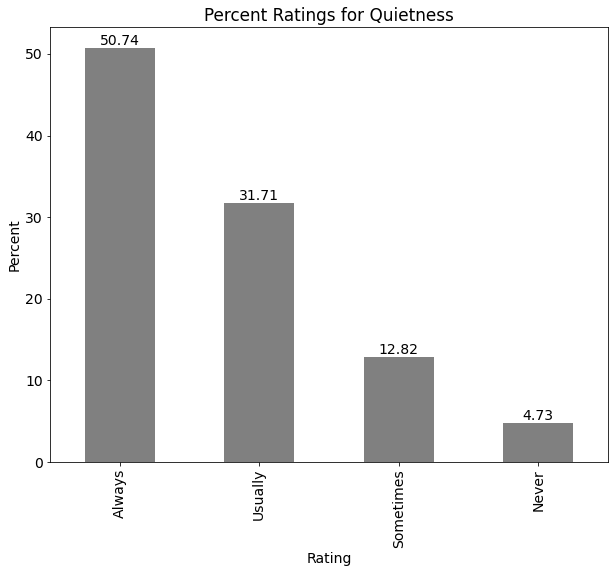

In [78]:
Q09.plot(kind='bar',  color = 'gray');
plt.title('Percent Ratings for Quietness');
positions = (0,1,2,3)
labels = ('Always', 'Usually', 'Sometimes', 'Never');
plt.xticks(positions, labels);
plt.xlabel('Rating');
plt.ylabel('Percent');

#add data value labels to bars, i: pass x and y coordinates, y[i]: height and string,
#ha:set horizontal alignment, va:set verticle alignment
y=[50.74, 31.71, 12.82, 4.73]
for i in range(len(positions)):
    plt.text(i, y[i], y[i], ha='center', va='bottom')

51% of respondents rated hospitals with a 4 rating for hospital quietness.

# Correlations

Since the majority of the data is categorical, I will use the chi square test to test the relationships between some of the questionable categorical variables. Another correlation will be performed once transformations are completed.

In [79]:
patient_data.columns

Index(['WES_HOSPID', 'FINAL_STATE', 'FINAL_BEDSIZE', 'FINAL_OWNERSHIP',
       'FINAL_TEACHING', 'FINAL_REGION', 'AGE', 'Q01_06', 'Q02_06', 'Q03_06',
       'Q04_06', 'Q05_06', 'Q06_06', 'Q07_06', 'Q08_06', 'Q09_06', 'Q10_06',
       'Q11_06', 'Q12_06', 'Q13_06', 'Q14_06', 'Q15_06', 'Q16_06', 'Q17_06',
       'Q18_06', 'Q19_06', 'Q20_06', 'Q21_06', 'Q22_06', 'Q23_06', 'Q24_06',
       'Q25_06', 'Q26A_06', 'Q26B_06', 'Q26C_06', 'Q26D_06', 'Q26E_06',
       'Q27_06', 'RECORDID', 'RACE', 'FINAL_MODE', 'SEX', 'CRITICAL_HOSPITAL',
       'ADMISSIONSOURCE', 'PRINCIPALREASONADMISSION', 'PATIENTDISCHARGEDATE',
       'SURVLANG'],
      dtype='object')

In [80]:
from scipy.stats import chi2_contingency

### Correlation between admission source and principal reason admission

In [81]:
contingency2 = pd.crosstab(patient_data['ADMISSIONSOURCE'],patient_data['PRINCIPALREASONADMISSION'], normalize=True )
contingency2

PRINCIPALREASONADMISSION,1.0,2.0,3.0
ADMISSIONSOURCE,,,
1,0.133021,0.126157,0.224435
2,0.004669,0.007128,0.011676
3,0.001165,0.000668,0.001954
4,0.000284,0.014326,0.007390
5,0.000114,0.001613,0.000448
6,0.000263,0.002402,0.001208
7,0.002231,0.291482,0.061902
8,0.000014,0.000298,0.000163
9,0.019258,0.049907,0.035410


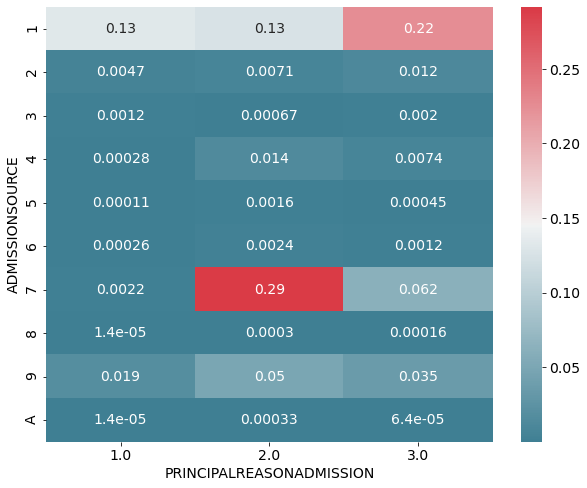

In [82]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(contingency2, annot=True, cmap=cmap);

In [83]:
c, p , dof, expected = chi2_contingency(contingency2)

In [84]:
print(p)

0.9999999999999462


The p value is greater than 0.05, so we can conclude that no relationship exists between the two variables.

### Correlation between critical hospital and admission source

In [85]:
contingency3 = pd.crosstab(patient_data['ADMISSIONSOURCE'],patient_data['CRITICAL_HOSPITAL'], normalize=True )
contingency3

CRITICAL_HOSPITAL,N,Y
ADMISSIONSOURCE,,
1,0.372390,0.011002
2,0.018968,0.000157
3,0.002973,0.000037
4,0.017909,0.000173
5,0.001479,0.000283
6,0.003005,0.000058
7,0.274708,0.009618
8,0.000252,0.000126
9,0.283051,0.003461


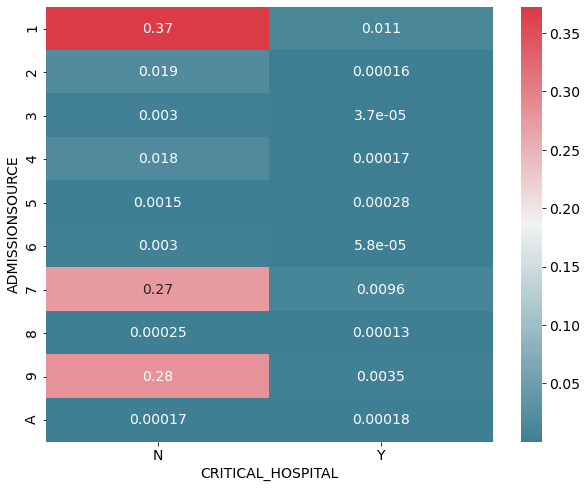

In [86]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(contingency3, annot=True, cmap=cmap);

In [87]:
c, p , dof, expected = chi2_contingency(contingency3)

In [88]:
print(p)

0.9999999999992895


The p value is greater than 0.05, so we can conclude that no relationship exists between the two variables.

# Data Cleansing

## Handle Missing Values

### Handle missing values for Sex

In [89]:
patient_data["SEX"].isnull().sum()

488

In [90]:
patient_data["SEX"].unique()

array([ 1.,  2., nan])

In [91]:
#fillna with 3 to create a numeric category for missing sex
patient_data["SEX"].fillna(value=3, inplace=True)

In [92]:
patient_data["SEX"].isnull().sum()

0

### Handle Missing Values for Race

In [93]:
patient_data["RACE"].isnull().sum()

17833

Note: There are alot of missing values for race. Typically, in most cases race is not a required field and respondents have the option not to disclose their race. Therefore, missing values will be coded with the next number in squence, which is 6.

In [94]:
patient_data["RACE"].unique()

array([ 1.,  2.,  6., nan,  5.,  3.,  4.])

In [95]:
# per data dictionary, race/ethnicity should only have a category of 1-5
# there is no definition for category 6, so I will categorize 6 as missing
# I will also fillna with a 6 to include missing races
patient_data["RACE"].fillna(value = 6, inplace=True)

In [96]:
patient_data["RACE"].isnull().sum()

0

### Handle missing values for Age

In [97]:
patient_data["AGE"].isnull().sum()

2977

In [98]:
patient_data['AGE'].unique()

array([ 8.,  7.,  6., 13., 15., 12., 10., 11.,  9.,  2., 14.,  4.,  5.,
        1.,  3., nan])

In [99]:
# since ages are grouped in bins, the missing ages will be coded as category 16 for missing. 
patient_data['AGE'].fillna(value='16', inplace=True)

In [100]:
patient_data['AGE'].isnull().sum()

0

### Handle missing values for principal reason admission

In [101]:
patient_data["PRINCIPALREASONADMISSION"].isnull().sum()

49968

Note: There are many missing values. However, per the data dictionary, respondents only have three options, which are Surgical, Medical and Maternity. There's also a category to capture missing. An assumption can be made that this question was skipped if the patient did not find the appropriate reason for admission listed on the survey. Therefore, all missing values will be captured with the next number in sequence, which is 4.

In [102]:
patient_data["PRINCIPALREASONADMISSION"].unique()

array([ 2.,  3.,  1., nan])

In [103]:
#fillna with 4 to create a numeric category for missing race
patient_data["PRINCIPALREASONADMISSION"].fillna(value='4', inplace=True)

In [104]:
patient_data["PRINCIPALREASONADMISSION"].isnull().sum()

0

### Handle missing values for questions

Note:Typically, surveys may contain many missing responses, especially if questions do not apply to the respondent. With the volume of missing data, if the missing data is removed, this may cause a high loss of data. In this case, the missing data will be replaced with a category to capture missing values, similar to how they are captured in the data dictionary. All questions will be given the same missing value indicator to avoid confusion, since some questions are on a different scale. This indicator will be M.

In [105]:
patient_data.columns

Index(['WES_HOSPID', 'FINAL_STATE', 'FINAL_BEDSIZE', 'FINAL_OWNERSHIP',
       'FINAL_TEACHING', 'FINAL_REGION', 'AGE', 'Q01_06', 'Q02_06', 'Q03_06',
       'Q04_06', 'Q05_06', 'Q06_06', 'Q07_06', 'Q08_06', 'Q09_06', 'Q10_06',
       'Q11_06', 'Q12_06', 'Q13_06', 'Q14_06', 'Q15_06', 'Q16_06', 'Q17_06',
       'Q18_06', 'Q19_06', 'Q20_06', 'Q21_06', 'Q22_06', 'Q23_06', 'Q24_06',
       'Q25_06', 'Q26A_06', 'Q26B_06', 'Q26C_06', 'Q26D_06', 'Q26E_06',
       'Q27_06', 'RECORDID', 'RACE', 'FINAL_MODE', 'SEX', 'CRITICAL_HOSPITAL',
       'ADMISSIONSOURCE', 'PRINCIPALREASONADMISSION', 'PATIENTDISCHARGEDATE',
       'SURVLANG'],
      dtype='object')

In [106]:
missing_cols= ['Q01_06', 'Q02_06', 'Q03_06',
       'Q04_06', 'Q05_06', 'Q06_06', 'Q07_06', 'Q08_06', 'Q09_06', 'Q10_06',
       'Q11_06', 'Q12_06', 'Q13_06', 'Q14_06', 'Q15_06', 'Q16_06', 'Q17_06',
       'Q18_06', 'Q19_06', 'Q20_06','Q21_06','Q22_06', 'Q23_06', 'Q24_06',
       'Q25_06', 'Q26A_06', 'Q26B_06', 'Q26C_06', 'Q26D_06', 'Q26E_06',
       'Q27_06']

In [107]:
patient_data[missing_cols] = patient_data[missing_cols].fillna(value='M', axis=1)

In [108]:
patient_data[missing_cols].isnull().sum()

Q01_06     0
Q02_06     0
Q03_06     0
Q04_06     0
Q05_06     0
Q06_06     0
Q07_06     0
Q08_06     0
Q09_06     0
Q10_06     0
Q11_06     0
Q12_06     0
Q13_06     0
Q14_06     0
Q15_06     0
Q16_06     0
Q17_06     0
Q18_06     0
Q19_06     0
Q20_06     0
Q21_06     0
Q22_06     0
Q23_06     0
Q24_06     0
Q25_06     0
Q26A_06    0
Q26B_06    0
Q26C_06    0
Q26D_06    0
Q26E_06    0
Q27_06     0
dtype: int64

# Collapse Variables

### Collapse Q01_06

In [109]:
patient_data['Q01_06'].unique()

array([4.0, 2.0, 3.0, 1.0, 'M'], dtype=object)

In [110]:
patient_data['Q01_06'] = patient_data['Q01_06'].replace({1: 0, 2: 0, 3: 0, 4:1})

In [111]:
patient_data['Q01_06'].value_counts()

1    144869
0     44130
M      1691
Name: Q01_06, dtype: int64

### Collapse Q02_06

In [112]:
patient_data['Q02_06'].unique()

array([4.0, 2.0, 3.0, 1.0, 'M'], dtype=object)

In [113]:
patient_data['Q02_06'] = patient_data['Q02_06'].replace({1: 0, 2: 0, 3: 0, 4:1})

In [114]:
patient_data['Q01_06'].value_counts()

1    144869
0     44130
M      1691
Name: Q01_06, dtype: int64

### Collapse Q03_06

In [115]:
patient_data['Q03_06'].unique()

array([4.0, 2.0, 3.0, 1.0, 'M'], dtype=object)

In [116]:
patient_data['Q03_06'] = patient_data['Q03_06'].replace({1: 0, 2: 0, 3: 0, 4:1})

In [117]:
patient_data['Q03_06'].value_counts()

1    122757
0     65230
M      2703
Name: Q03_06, dtype: int64

### Collapse Q05_06

In [118]:
patient_data['Q05_06'].unique()

array(['M', 2.0, 4.0, 3.0, 1.0], dtype=object)

In [119]:
patient_data['Q05_06'] = patient_data['Q05_06'].replace({1: 0, 2: 0, 3: 0, 4:1})

In [120]:
patient_data['Q05_06'].value_counts()

1    157656
0     30153
M      2881
Name: Q05_06, dtype: int64

### Collapse Q06_06

In [121]:
patient_data['Q06_06'].unique()

array([4.0, 2.0, 3.0, 1.0, 'M'], dtype=object)

In [122]:
patient_data['Q06_06'] = patient_data['Q06_06'].replace({1: 0, 2: 0, 3: 0, 4:1})

In [123]:
patient_data['Q06_06'].value_counts()

1    140426
0     46781
M      3483
Name: Q06_06, dtype: int64

### Collapse Q07_06

In [124]:
patient_data['Q07_06'].unique()

array([4.0, 2.0, 3.0, 1.0, 'M'], dtype=object)

In [125]:
patient_data['Q07_06'] = patient_data['Q07_06'].replace({1: 0, 2: 0, 3: 0, 4:1})

In [126]:
patient_data['Q07_06'].value_counts()

1    133858
0     53259
M      3573
Name: Q07_06, dtype: int64

### Collapse Q08_06

In [127]:
patient_data['Q08_06'].unique()

array([3.0, 2.0, 4.0, 1.0, 'M'], dtype=object)

In [128]:
patient_data['Q08_06'] = patient_data['Q08_06'].replace({1: 0, 2: 0, 3: 0, 4:1})

In [129]:
patient_data['Q08_06'].value_counts()

1    120840
0     65484
M      4366
Name: Q08_06, dtype: int64

### Collapse Q09_06

In [130]:
patient_data['Q09_06'].unique()

array([3.0, 4.0, 2.0, 'M', 1.0], dtype=object)

In [131]:
patient_data['Q09_06'] = patient_data['Q09_06'].replace({1: 0, 2: 0, 3: 0, 4:1})

In [132]:
patient_data['Q09_06'].value_counts()

1    94807
0    92047
M     3836
Name: Q09_06, dtype: int64

### Collapse Final State

In [133]:
patient_data['FINAL_STATE'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MA', 'MD',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [134]:
patient_data['FINAL_STATE'] = patient_data['FINAL_STATE'].replace({'AL': 'South_Region', 
                                                                   'AK': 'South_Region', 
                                                                   'AZ': 'West_Region', 
                                                                   'AR': 'South_Region', 
                                                                   'CA': 'West_Region', 
                                                                   'CO': 'West_Region', 
                                                                   'CT': 'Northeast_Region', 
                                                                   'DE': 'South_Region',
                                                                   'DC': 'South_Region', 
                                                                   'FL': 'South_Region', 
                                                                   'GA': 'South_Region', 
                                                                   'HI': 'West_Region', 
                                                                   'ID': 'West_Region',
                                                                   'IL': 'Midwest_Region',
                                                                   'IN': 'Midwest_Region',
                                                                   'IA': 'Midwest_Region',
                                                                   'KS': 'Midwest_Region',
                                                                   'KY': 'South_Region',
                                                                   'LA': 'South_Region',
                                                                   'ME': 'Northeast_Region',
                                                                   'MA': 'Northeast_Region',
                                                                   'MD': 'South_Region',
                                                                   'MI': 'Midwest_Region', 
                                                                   'MN': 'Midwest_Region',
                                                                   'MS': 'South_Region',
                                                                   'MO': 'Midwest_Region', 
                                                                   'MT': 'West_Region',
                                                                   'NE': 'Midwest_Region',
                                                                   'NV': 'West_Region',
                                                                   'NH': 'Northeast_Region',
                                                                   'NJ': 'Northeast_Region',
                                                                   'NM': 'West_Region',
                                                                   'NY': 'Northeast_Region',
                                                                   'NC': 'South_Region',
                                                                   'ND': 'Midwest_Region',
                                                                   'OH': 'Midwest_Region',
                                                                   'OK': 'South_Region',
                                                                   'OR': 'West_Region',
                                                                   'PA': 'Northeast_Region',
                                                                   'SC': 'South_Region',
                                                                   'SD': 'Midwest_Region',
                                                                   'TN': 'South_Region',
                                                                   'TX': 'South_Region',
                                                                   'UT': 'West_Region',
                                                                   'VT': 'Northeast_Region',
                                                                   'VA': 'South_Region',
                                                                   'WA': 'West_Region',
                                                                   'WV': 'South_Region',
                                                                   'WI': 'Midwest_Region',
                                                                   'WY': 'West_Region'
                                                                  })

In [135]:
patient_data['FINAL_STATE'].unique()

array(['South_Region', 'West_Region', 'Northeast_Region',
       'Midwest_Region'], dtype=object)

In [136]:
patient_data['FINAL_STATE'].value_counts()

West_Region         85477
South_Region        63969
Midwest_Region      25553
Northeast_Region    15691
Name: FINAL_STATE, dtype: int64

In [137]:
patient_data['FINAL_STATE'].value_counts(normalize=True)*100

West_Region         44.825109
South_Region        33.546070
Midwest_Region      13.400283
Northeast_Region     8.228538
Name: FINAL_STATE, dtype: float64

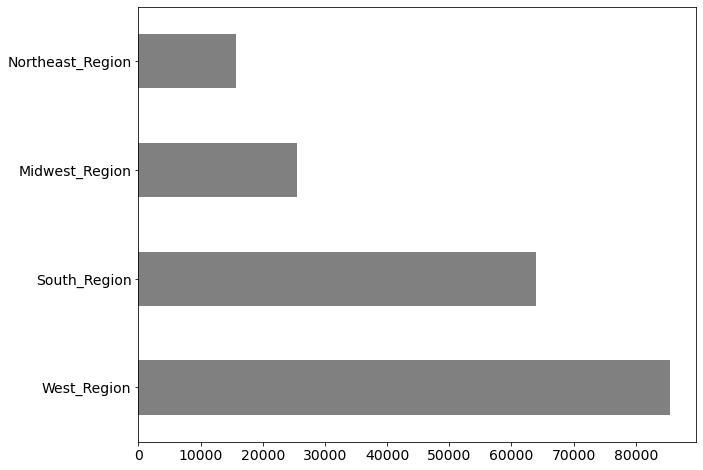

In [138]:
patient_data['FINAL_STATE'].value_counts().plot(kind='barh', color='gray');

### Collapse patient discharge date

In [139]:
patient_data['PATIENTDISCHARGEDATE'].unique()

array([200605, 200606, 200607, 200608, 200609, 200604, 200512, 200601,
       200602, 200603], dtype=int64)

In [140]:
patient_data['PATIENTDISCHARGEDATE'] = patient_data['PATIENTDISCHARGEDATE'].replace({200605: 'Spring 2006',
                                                                                     200606: 'Summer 2006',
                                                                                     200607: 'Summer 2006',
                                                                                     200608: 'Summer 2006',
                                                                                     200609: 'Fall 2006',
                                                                                     200604: 'Spring 2006',
                                                                                     200601: 'Winter 2006',
                                                                                     200602: 'Winter 2006',
                                                                                     200603: 'Spring 2006',
                                                                                     200512: 'Winter 2005'})

In [141]:
patient_data['PATIENTDISCHARGEDATE'].value_counts()

Summer 2006    72731
Spring 2006    48621
Winter 2006    34046
Fall 2006      21962
Winter 2005    13330
Name: PATIENTDISCHARGEDATE, dtype: int64

In [142]:
patient_data['PATIENTDISCHARGEDATE'].value_counts(normalize=True)*100

Summer 2006    38.140962
Spring 2006    25.497404
Winter 2006    17.854109
Fall 2006      11.517122
Winter 2005     6.990403
Name: PATIENTDISCHARGEDATE, dtype: float64

In [143]:
month_year_discg = patient_data.PATIENTDISCHARGEDATE.str.split(expand=True)

In [144]:
patient_data = patient_data.join(month_year_discg)

In [145]:
patient_data.rename(columns = {0: 'Season', 1: 'Year'}, inplace=True)

In [146]:
patient_data.head()

,WES_HOSPID,FINAL_STATE,FINAL_BEDSIZE,FINAL_OWNERSHIP,FINAL_TEACHING,FINAL_REGION,AGE,Q01_06,Q02_06,Q03_06,Q04_06,Q05_06,Q06_06,Q07_06,Q08_06,Q09_06,Q10_06,Q11_06,Q12_06,Q13_06,Q14_06,Q15_06,Q16_06,Q17_06,Q18_06,Q19_06,Q20_06,Q21_06,Q22_06,Q23_06,Q24_06,Q25_06,Q26A_06,Q26B_06,Q26C_06,Q26D_06,Q26E_06,Q27_06,RECORDID,RACE,FINAL_MODE,SEX,CRITICAL_HOSPITAL,ADMISSIONSOURCE,PRINCIPALREASONADMISSION,PATIENTDISCHARGEDATE,SURVLANG,Season,Year
0,1,South_Region,4,3,3,5,8,1,1,1,3,M,1,1,0,0,2,M,2,M,M,2,M,M,1,M,2,9,3,2,2,1,1,0,0,0,0,1,2,1.0,1,1.0,N,1,2,Spring 2006,1,Spring,2006
1,1,South_Region,4,3,3,5,8,0,0,0,2,0,0,0,0,0,2,M,1,2,2,1,2,1,1,M,1,5,3,4,1,1,1,0,0,0,0,1,7,1.0,1,2.0,N,7,2,Spring 2006,1,Spring,2006
2,1,South_Region,4,3,3,5,7,1,1,1,3,1,1,1,0,1,2,M,2,M,M,1,2,2,1,1,1,10,4,3,2,M,0,1,0,0,0,1,10,2.0,1,2.0,N,7,2,Spring 2006,1,Spring,2006
3,1,South_Region,4,3,3,5,6,1,0,0,3,1,1,1,1,0,2,M,1,3,3,2,M,M,1,1,1,9,4,4,4,1,1,0,0,0,0,1,13,1.0,1,2.0,N,7,2,Spring 2006,1,Spring,2006
4,1,South_Region,4,3,3,5,8,0,0,0,4,1,1,1,0,0,2,M,1,2,3,1,4,1,1,M,M,8,4,3,4,1,0,1,0,0,0,1,16,2.0,1,1.0,N,7,2,Spring 2006,1,Spring,2006


In [147]:
patient_data['Season'].value_counts(normalize=True)*100

Summer    38.140962
Spring    25.497404
Winter    24.844512
Fall      11.517122
Name: Season, dtype: float64

# Create Dummy Variables
Note: For features that contained missing values, which a category was created to track the missing values as missing, these categories were dropped from the dataframe, once dummy variables was created. An additional column was also dropped, since the other columns captured the information needed about the feature.

### Q01_06

In [148]:
questions_dummies_Q01 = pd.get_dummies(patient_data['Q01_06'],prefix = 'Q01')

In [149]:
questions_dummies_Q01.sample(n=5, random_state=1)

,Q01_0,Q01_1,Q01_M
165489,0,1,0
140893,1,0,0
19321,0,1,0
146099,0,1,0
5150,0,1,0


In [150]:
questions_dummies_Q01.drop(["Q01_M", "Q01_0"], axis=1, inplace=True)

In [151]:
questions_dummies_Q01.columns

Index(['Q01_1'], dtype='object')

In [152]:
patient_data = patient_data.join(questions_dummies_Q01)

In [153]:
patient_data.sample(n=5, random_state=1)

,WES_HOSPID,FINAL_STATE,FINAL_BEDSIZE,FINAL_OWNERSHIP,FINAL_TEACHING,FINAL_REGION,AGE,Q01_06,Q02_06,Q03_06,Q04_06,Q05_06,Q06_06,Q07_06,Q08_06,Q09_06,Q10_06,Q11_06,Q12_06,Q13_06,Q14_06,Q15_06,Q16_06,Q17_06,Q18_06,Q19_06,Q20_06,Q21_06,Q22_06,Q23_06,Q24_06,Q25_06,Q26A_06,Q26B_06,Q26C_06,Q26D_06,Q26E_06,Q27_06,RECORDID,RACE,FINAL_MODE,SEX,CRITICAL_HOSPITAL,ADMISSIONSOURCE,PRINCIPALREASONADMISSION,PATIENTDISCHARGEDATE,SURVLANG,Season,Year,Q01_1
165489,769,South_Region,2,3,2,7,9,1,1,1,3,1,1,1,1,1,2,M,1,2,2,2,M,M,1,1,1,10,4,3,4,1,1,0,0,0,0,1,493323,1.0,1,1.0,N,1,3,Spring 2006,1,Spring,2006,1
140893,645,Northeast_Region,7,2,1,2,1,0,1,1,4,1,1,1,1,0,2,M,1,4,4,2,M,M,2,1,2,9,4,1,4,1,1,0,0,0,0,1,424489,1.0,1,2.0,N,1,1,Spring 2006,1,Spring,2006,0
19321,73,West_Region,7,2,3,9,9,1,1,1,4,0,0,0,1,1,1,2,M,2,4,2,M,M,3,M,M,10,4,1,2,M,0,0,0,1,0,1,59829,4.0,1,2.0,N,7,2,Summer 2006,1,Summer,2006,1
146099,660,Northeast_Region,4,3,3,2,8,1,1,1,4,1,1,1,1,0,2,M,2,M,M,1,4,4,1,1,1,8,4,2,3,2,1,0,0,0,0,1,438494,1.0,2,2.0,N,9,4,Fall 2006,1,Fall,2006,1
5150,32,West_Region,4,2,3,9,14,1,1,0,9,1,1,1,1,1,2,M,2,M,M,1,4,1,1,2,1,9,3,3,3,1,1,0,0,0,0,1,16854,1.0,1,2.0,N,1,2,Winter 2005,1,Winter,2005,1


### Q02_06

In [154]:
questions_dummies_Q02 = pd.get_dummies(patient_data['Q02_06'],prefix = 'Q02')

In [155]:
questions_dummies_Q02.sample(n=5, random_state=1)

,Q02_0,Q02_1,Q02_M
165489,0,1,0
140893,0,1,0
19321,0,1,0
146099,0,1,0
5150,0,1,0


In [156]:
questions_dummies_Q02.drop(["Q02_M", "Q02_0"], axis=1, inplace=True)

In [157]:
questions_dummies_Q02.columns

Index(['Q02_1'], dtype='object')

In [158]:
patient_data = patient_data.join(questions_dummies_Q02)

In [159]:
patient_data.sample(n=5, random_state=1)

,WES_HOSPID,FINAL_STATE,FINAL_BEDSIZE,FINAL_OWNERSHIP,FINAL_TEACHING,FINAL_REGION,AGE,Q01_06,Q02_06,Q03_06,Q04_06,Q05_06,Q06_06,Q07_06,Q08_06,Q09_06,Q10_06,Q11_06,Q12_06,Q13_06,Q14_06,Q15_06,Q16_06,Q17_06,Q18_06,Q19_06,Q20_06,Q21_06,Q22_06,Q23_06,Q24_06,Q25_06,Q26A_06,Q26B_06,Q26C_06,Q26D_06,Q26E_06,Q27_06,RECORDID,RACE,FINAL_MODE,SEX,CRITICAL_HOSPITAL,ADMISSIONSOURCE,PRINCIPALREASONADMISSION,PATIENTDISCHARGEDATE,SURVLANG,Season,Year,Q01_1,Q02_1
165489,769,South_Region,2,3,2,7,9,1,1,1,3,1,1,1,1,1,2,M,1,2,2,2,M,M,1,1,1,10,4,3,4,1,1,0,0,0,0,1,493323,1.0,1,1.0,N,1,3,Spring 2006,1,Spring,2006,1,1
140893,645,Northeast_Region,7,2,1,2,1,0,1,1,4,1,1,1,1,0,2,M,1,4,4,2,M,M,2,1,2,9,4,1,4,1,1,0,0,0,0,1,424489,1.0,1,2.0,N,1,1,Spring 2006,1,Spring,2006,0,1
19321,73,West_Region,7,2,3,9,9,1,1,1,4,0,0,0,1,1,1,2,M,2,4,2,M,M,3,M,M,10,4,1,2,M,0,0,0,1,0,1,59829,4.0,1,2.0,N,7,2,Summer 2006,1,Summer,2006,1,1
146099,660,Northeast_Region,4,3,3,2,8,1,1,1,4,1,1,1,1,0,2,M,2,M,M,1,4,4,1,1,1,8,4,2,3,2,1,0,0,0,0,1,438494,1.0,2,2.0,N,9,4,Fall 2006,1,Fall,2006,1,1
5150,32,West_Region,4,2,3,9,14,1,1,0,9,1,1,1,1,1,2,M,2,M,M,1,4,1,1,2,1,9,3,3,3,1,1,0,0,0,0,1,16854,1.0,1,2.0,N,1,2,Winter 2005,1,Winter,2005,1,1


### Q03_06

In [160]:
questions_dummies_Q03 = pd.get_dummies(patient_data['Q03_06'],prefix = 'Q03')

In [161]:
questions_dummies_Q03.sample(n=5, random_state=1)

,Q03_0,Q03_1,Q03_M
165489,0,1,0
140893,0,1,0
19321,0,1,0
146099,0,1,0
5150,1,0,0


In [162]:
questions_dummies_Q03.drop(["Q03_M", "Q03_0"], axis=1, inplace=True)

In [163]:
questions_dummies_Q03.columns

Index(['Q03_1'], dtype='object')

In [164]:
patient_data = patient_data.join(questions_dummies_Q03)

In [165]:
patient_data.sample(n=5, random_state=1)

,WES_HOSPID,FINAL_STATE,FINAL_BEDSIZE,FINAL_OWNERSHIP,FINAL_TEACHING,FINAL_REGION,AGE,Q01_06,Q02_06,Q03_06,Q04_06,Q05_06,Q06_06,Q07_06,Q08_06,Q09_06,Q10_06,Q11_06,Q12_06,Q13_06,Q14_06,Q15_06,Q16_06,Q17_06,Q18_06,Q19_06,Q20_06,Q21_06,Q22_06,Q23_06,Q24_06,Q25_06,Q26A_06,Q26B_06,Q26C_06,Q26D_06,Q26E_06,Q27_06,RECORDID,RACE,FINAL_MODE,SEX,CRITICAL_HOSPITAL,ADMISSIONSOURCE,PRINCIPALREASONADMISSION,PATIENTDISCHARGEDATE,SURVLANG,Season,Year,Q01_1,Q02_1,Q03_1
165489,769,South_Region,2,3,2,7,9,1,1,1,3,1,1,1,1,1,2,M,1,2,2,2,M,M,1,1,1,10,4,3,4,1,1,0,0,0,0,1,493323,1.0,1,1.0,N,1,3,Spring 2006,1,Spring,2006,1,1,1
140893,645,Northeast_Region,7,2,1,2,1,0,1,1,4,1,1,1,1,0,2,M,1,4,4,2,M,M,2,1,2,9,4,1,4,1,1,0,0,0,0,1,424489,1.0,1,2.0,N,1,1,Spring 2006,1,Spring,2006,0,1,1
19321,73,West_Region,7,2,3,9,9,1,1,1,4,0,0,0,1,1,1,2,M,2,4,2,M,M,3,M,M,10,4,1,2,M,0,0,0,1,0,1,59829,4.0,1,2.0,N,7,2,Summer 2006,1,Summer,2006,1,1,1
146099,660,Northeast_Region,4,3,3,2,8,1,1,1,4,1,1,1,1,0,2,M,2,M,M,1,4,4,1,1,1,8,4,2,3,2,1,0,0,0,0,1,438494,1.0,2,2.0,N,9,4,Fall 2006,1,Fall,2006,1,1,1
5150,32,West_Region,4,2,3,9,14,1,1,0,9,1,1,1,1,1,2,M,2,M,M,1,4,1,1,2,1,9,3,3,3,1,1,0,0,0,0,1,16854,1.0,1,2.0,N,1,2,Winter 2005,1,Winter,2005,1,1,0


### Q05_06

In [166]:
questions_dummies_Q05 = pd.get_dummies(patient_data['Q05_06'],prefix = 'Q05')

In [167]:
questions_dummies_Q05.sample(n=5, random_state=1)

,Q05_0,Q05_1,Q05_M
165489,0,1,0
140893,0,1,0
19321,1,0,0
146099,0,1,0
5150,0,1,0


In [168]:
questions_dummies_Q05.drop(["Q05_M", "Q05_0"], axis=1, inplace=True)

In [169]:
questions_dummies_Q05.columns

Index(['Q05_1'], dtype='object')

In [170]:
patient_data = patient_data.join(questions_dummies_Q05)

In [171]:
patient_data.sample(n=5, random_state=1)

,WES_HOSPID,FINAL_STATE,FINAL_BEDSIZE,FINAL_OWNERSHIP,FINAL_TEACHING,FINAL_REGION,AGE,Q01_06,Q02_06,Q03_06,Q04_06,Q05_06,Q06_06,Q07_06,Q08_06,Q09_06,Q10_06,Q11_06,Q12_06,Q13_06,Q14_06,Q15_06,Q16_06,Q17_06,Q18_06,Q19_06,Q20_06,Q21_06,Q22_06,Q23_06,Q24_06,Q25_06,Q26A_06,Q26B_06,Q26C_06,Q26D_06,Q26E_06,Q27_06,RECORDID,RACE,FINAL_MODE,SEX,CRITICAL_HOSPITAL,ADMISSIONSOURCE,PRINCIPALREASONADMISSION,PATIENTDISCHARGEDATE,SURVLANG,Season,Year,Q01_1,Q02_1,Q03_1,Q05_1
165489,769,South_Region,2,3,2,7,9,1,1,1,3,1,1,1,1,1,2,M,1,2,2,2,M,M,1,1,1,10,4,3,4,1,1,0,0,0,0,1,493323,1.0,1,1.0,N,1,3,Spring 2006,1,Spring,2006,1,1,1,1
140893,645,Northeast_Region,7,2,1,2,1,0,1,1,4,1,1,1,1,0,2,M,1,4,4,2,M,M,2,1,2,9,4,1,4,1,1,0,0,0,0,1,424489,1.0,1,2.0,N,1,1,Spring 2006,1,Spring,2006,0,1,1,1
19321,73,West_Region,7,2,3,9,9,1,1,1,4,0,0,0,1,1,1,2,M,2,4,2,M,M,3,M,M,10,4,1,2,M,0,0,0,1,0,1,59829,4.0,1,2.0,N,7,2,Summer 2006,1,Summer,2006,1,1,1,0
146099,660,Northeast_Region,4,3,3,2,8,1,1,1,4,1,1,1,1,0,2,M,2,M,M,1,4,4,1,1,1,8,4,2,3,2,1,0,0,0,0,1,438494,1.0,2,2.0,N,9,4,Fall 2006,1,Fall,2006,1,1,1,1
5150,32,West_Region,4,2,3,9,14,1,1,0,9,1,1,1,1,1,2,M,2,M,M,1,4,1,1,2,1,9,3,3,3,1,1,0,0,0,0,1,16854,1.0,1,2.0,N,1,2,Winter 2005,1,Winter,2005,1,1,0,1


### Q06_06

In [172]:
questions_dummies_Q06 = pd.get_dummies(patient_data['Q06_06'],prefix = 'Q06')

In [173]:
questions_dummies_Q06.sample(n=5, random_state=1)

,Q06_0,Q06_1,Q06_M
165489,0,1,0
140893,0,1,0
19321,1,0,0
146099,0,1,0
5150,0,1,0


In [174]:
questions_dummies_Q06.drop(["Q06_M","Q06_0"], axis=1, inplace=True)

In [175]:
questions_dummies_Q06.columns

Index(['Q06_1'], dtype='object')

In [176]:
patient_data = patient_data.join(questions_dummies_Q06)

In [177]:
patient_data.sample(n=5, random_state=1)

,WES_HOSPID,FINAL_STATE,FINAL_BEDSIZE,FINAL_OWNERSHIP,FINAL_TEACHING,FINAL_REGION,AGE,Q01_06,Q02_06,Q03_06,Q04_06,Q05_06,Q06_06,Q07_06,Q08_06,Q09_06,Q10_06,Q11_06,Q12_06,Q13_06,Q14_06,Q15_06,Q16_06,Q17_06,Q18_06,Q19_06,Q20_06,Q21_06,Q22_06,Q23_06,Q24_06,Q25_06,Q26A_06,Q26B_06,Q26C_06,Q26D_06,Q26E_06,Q27_06,RECORDID,RACE,FINAL_MODE,SEX,CRITICAL_HOSPITAL,ADMISSIONSOURCE,PRINCIPALREASONADMISSION,PATIENTDISCHARGEDATE,SURVLANG,Season,Year,Q01_1,Q02_1,Q03_1,Q05_1,Q06_1
165489,769,South_Region,2,3,2,7,9,1,1,1,3,1,1,1,1,1,2,M,1,2,2,2,M,M,1,1,1,10,4,3,4,1,1,0,0,0,0,1,493323,1.0,1,1.0,N,1,3,Spring 2006,1,Spring,2006,1,1,1,1,1
140893,645,Northeast_Region,7,2,1,2,1,0,1,1,4,1,1,1,1,0,2,M,1,4,4,2,M,M,2,1,2,9,4,1,4,1,1,0,0,0,0,1,424489,1.0,1,2.0,N,1,1,Spring 2006,1,Spring,2006,0,1,1,1,1
19321,73,West_Region,7,2,3,9,9,1,1,1,4,0,0,0,1,1,1,2,M,2,4,2,M,M,3,M,M,10,4,1,2,M,0,0,0,1,0,1,59829,4.0,1,2.0,N,7,2,Summer 2006,1,Summer,2006,1,1,1,0,0
146099,660,Northeast_Region,4,3,3,2,8,1,1,1,4,1,1,1,1,0,2,M,2,M,M,1,4,4,1,1,1,8,4,2,3,2,1,0,0,0,0,1,438494,1.0,2,2.0,N,9,4,Fall 2006,1,Fall,2006,1,1,1,1,1
5150,32,West_Region,4,2,3,9,14,1,1,0,9,1,1,1,1,1,2,M,2,M,M,1,4,1,1,2,1,9,3,3,3,1,1,0,0,0,0,1,16854,1.0,1,2.0,N,1,2,Winter 2005,1,Winter,2005,1,1,0,1,1


### Q07_06

In [178]:
questions_dummies_Q07 = pd.get_dummies(patient_data['Q07_06'],prefix = 'Q07')

In [179]:
questions_dummies_Q07.sample(n=5, random_state=1)

,Q07_0,Q07_1,Q07_M
165489,0,1,0
140893,0,1,0
19321,1,0,0
146099,0,1,0
5150,0,1,0


In [180]:
questions_dummies_Q07.drop(["Q07_M","Q07_0"], axis=1, inplace=True)

In [181]:
questions_dummies_Q07.columns

Index(['Q07_1'], dtype='object')

In [182]:
patient_data = patient_data.join(questions_dummies_Q07)

In [183]:
patient_data.sample(n=5, random_state=1)

,WES_HOSPID,FINAL_STATE,FINAL_BEDSIZE,FINAL_OWNERSHIP,FINAL_TEACHING,FINAL_REGION,AGE,Q01_06,Q02_06,Q03_06,Q04_06,Q05_06,Q06_06,Q07_06,Q08_06,Q09_06,Q10_06,Q11_06,Q12_06,Q13_06,Q14_06,Q15_06,Q16_06,Q17_06,Q18_06,Q19_06,Q20_06,Q21_06,Q22_06,Q23_06,Q24_06,Q25_06,Q26A_06,Q26B_06,Q26C_06,Q26D_06,Q26E_06,Q27_06,RECORDID,RACE,FINAL_MODE,SEX,CRITICAL_HOSPITAL,ADMISSIONSOURCE,PRINCIPALREASONADMISSION,PATIENTDISCHARGEDATE,SURVLANG,Season,Year,Q01_1,Q02_1,Q03_1,Q05_1,Q06_1,Q07_1
165489,769,South_Region,2,3,2,7,9,1,1,1,3,1,1,1,1,1,2,M,1,2,2,2,M,M,1,1,1,10,4,3,4,1,1,0,0,0,0,1,493323,1.0,1,1.0,N,1,3,Spring 2006,1,Spring,2006,1,1,1,1,1,1
140893,645,Northeast_Region,7,2,1,2,1,0,1,1,4,1,1,1,1,0,2,M,1,4,4,2,M,M,2,1,2,9,4,1,4,1,1,0,0,0,0,1,424489,1.0,1,2.0,N,1,1,Spring 2006,1,Spring,2006,0,1,1,1,1,1
19321,73,West_Region,7,2,3,9,9,1,1,1,4,0,0,0,1,1,1,2,M,2,4,2,M,M,3,M,M,10,4,1,2,M,0,0,0,1,0,1,59829,4.0,1,2.0,N,7,2,Summer 2006,1,Summer,2006,1,1,1,0,0,0
146099,660,Northeast_Region,4,3,3,2,8,1,1,1,4,1,1,1,1,0,2,M,2,M,M,1,4,4,1,1,1,8,4,2,3,2,1,0,0,0,0,1,438494,1.0,2,2.0,N,9,4,Fall 2006,1,Fall,2006,1,1,1,1,1,1
5150,32,West_Region,4,2,3,9,14,1,1,0,9,1,1,1,1,1,2,M,2,M,M,1,4,1,1,2,1,9,3,3,3,1,1,0,0,0,0,1,16854,1.0,1,2.0,N,1,2,Winter 2005,1,Winter,2005,1,1,0,1,1,1


### Q08_06

In [184]:
questions_dummies_Q08 = pd.get_dummies(patient_data['Q08_06'],prefix = 'Q08')

In [185]:
questions_dummies_Q08.sample(n=5, random_state=1)

,Q08_0,Q08_1,Q08_M
165489,0,1,0
140893,0,1,0
19321,0,1,0
146099,0,1,0
5150,0,1,0


In [186]:
questions_dummies_Q08.drop(["Q08_M","Q08_0"], axis=1, inplace=True)

In [187]:
questions_dummies_Q08.columns

Index(['Q08_1'], dtype='object')

In [188]:
patient_data = patient_data.join(questions_dummies_Q08)

In [189]:
patient_data.sample(n=5, random_state=1)

,WES_HOSPID,FINAL_STATE,FINAL_BEDSIZE,FINAL_OWNERSHIP,FINAL_TEACHING,FINAL_REGION,AGE,Q01_06,Q02_06,Q03_06,Q04_06,Q05_06,Q06_06,Q07_06,Q08_06,Q09_06,Q10_06,Q11_06,Q12_06,Q13_06,Q14_06,Q15_06,Q16_06,Q17_06,Q18_06,Q19_06,Q20_06,Q21_06,Q22_06,Q23_06,Q24_06,Q25_06,Q26A_06,Q26B_06,Q26C_06,Q26D_06,Q26E_06,Q27_06,RECORDID,RACE,FINAL_MODE,SEX,CRITICAL_HOSPITAL,ADMISSIONSOURCE,PRINCIPALREASONADMISSION,PATIENTDISCHARGEDATE,SURVLANG,Season,Year,Q01_1,Q02_1,Q03_1,Q05_1,Q06_1,Q07_1,Q08_1
165489,769,South_Region,2,3,2,7,9,1,1,1,3,1,1,1,1,1,2,M,1,2,2,2,M,M,1,1,1,10,4,3,4,1,1,0,0,0,0,1,493323,1.0,1,1.0,N,1,3,Spring 2006,1,Spring,2006,1,1,1,1,1,1,1
140893,645,Northeast_Region,7,2,1,2,1,0,1,1,4,1,1,1,1,0,2,M,1,4,4,2,M,M,2,1,2,9,4,1,4,1,1,0,0,0,0,1,424489,1.0,1,2.0,N,1,1,Spring 2006,1,Spring,2006,0,1,1,1,1,1,1
19321,73,West_Region,7,2,3,9,9,1,1,1,4,0,0,0,1,1,1,2,M,2,4,2,M,M,3,M,M,10,4,1,2,M,0,0,0,1,0,1,59829,4.0,1,2.0,N,7,2,Summer 2006,1,Summer,2006,1,1,1,0,0,0,1
146099,660,Northeast_Region,4,3,3,2,8,1,1,1,4,1,1,1,1,0,2,M,2,M,M,1,4,4,1,1,1,8,4,2,3,2,1,0,0,0,0,1,438494,1.0,2,2.0,N,9,4,Fall 2006,1,Fall,2006,1,1,1,1,1,1,1
5150,32,West_Region,4,2,3,9,14,1,1,0,9,1,1,1,1,1,2,M,2,M,M,1,4,1,1,2,1,9,3,3,3,1,1,0,0,0,0,1,16854,1.0,1,2.0,N,1,2,Winter 2005,1,Winter,2005,1,1,0,1,1,1,1


### Q09_06

In [190]:
questions_dummies_Q09 = pd.get_dummies(patient_data['Q09_06'],prefix = 'Q09')

In [191]:
questions_dummies_Q09.sample(n=5, random_state=1)

,Q09_0,Q09_1,Q09_M
165489,0,1,0
140893,1,0,0
19321,0,1,0
146099,1,0,0
5150,0,1,0


In [192]:
questions_dummies_Q09.drop(["Q09_M","Q09_0"], axis=1, inplace=True)

In [193]:
questions_dummies_Q09.columns

Index(['Q09_1'], dtype='object')

In [194]:
patient_data = patient_data.join(questions_dummies_Q09)

In [195]:
patient_data.sample(n=5, random_state=1)

,WES_HOSPID,FINAL_STATE,FINAL_BEDSIZE,FINAL_OWNERSHIP,FINAL_TEACHING,FINAL_REGION,AGE,Q01_06,Q02_06,Q03_06,Q04_06,Q05_06,Q06_06,Q07_06,Q08_06,Q09_06,Q10_06,Q11_06,Q12_06,Q13_06,Q14_06,Q15_06,Q16_06,Q17_06,Q18_06,Q19_06,Q20_06,Q21_06,Q22_06,Q23_06,Q24_06,Q25_06,Q26A_06,Q26B_06,Q26C_06,Q26D_06,Q26E_06,Q27_06,RECORDID,RACE,FINAL_MODE,SEX,CRITICAL_HOSPITAL,ADMISSIONSOURCE,PRINCIPALREASONADMISSION,PATIENTDISCHARGEDATE,SURVLANG,Season,Year,Q01_1,Q02_1,Q03_1,Q05_1,Q06_1,Q07_1,Q08_1,Q09_1
165489,769,South_Region,2,3,2,7,9,1,1,1,3,1,1,1,1,1,2,M,1,2,2,2,M,M,1,1,1,10,4,3,4,1,1,0,0,0,0,1,493323,1.0,1,1.0,N,1,3,Spring 2006,1,Spring,2006,1,1,1,1,1,1,1,1
140893,645,Northeast_Region,7,2,1,2,1,0,1,1,4,1,1,1,1,0,2,M,1,4,4,2,M,M,2,1,2,9,4,1,4,1,1,0,0,0,0,1,424489,1.0,1,2.0,N,1,1,Spring 2006,1,Spring,2006,0,1,1,1,1,1,1,0
19321,73,West_Region,7,2,3,9,9,1,1,1,4,0,0,0,1,1,1,2,M,2,4,2,M,M,3,M,M,10,4,1,2,M,0,0,0,1,0,1,59829,4.0,1,2.0,N,7,2,Summer 2006,1,Summer,2006,1,1,1,0,0,0,1,1
146099,660,Northeast_Region,4,3,3,2,8,1,1,1,4,1,1,1,1,0,2,M,2,M,M,1,4,4,1,1,1,8,4,2,3,2,1,0,0,0,0,1,438494,1.0,2,2.0,N,9,4,Fall 2006,1,Fall,2006,1,1,1,1,1,1,1,0
5150,32,West_Region,4,2,3,9,14,1,1,0,9,1,1,1,1,1,2,M,2,M,M,1,4,1,1,2,1,9,3,3,3,1,1,0,0,0,0,1,16854,1.0,1,2.0,N,1,2,Winter 2005,1,Winter,2005,1,1,0,1,1,1,1,1


### Age

In [196]:
questions_dummies_age = pd.get_dummies(patient_data['AGE'],prefix = 'AGE')

In [197]:
questions_dummies_age.sample(n=5, random_state=1)

,AGE_1.0,AGE_2.0,AGE_3.0,AGE_4.0,AGE_5.0,AGE_6.0,AGE_7.0,AGE_8.0,AGE_9.0,AGE_10.0,AGE_11.0,AGE_12.0,AGE_13.0,AGE_14.0,AGE_15.0,AGE_16
165489,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
140893,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19321,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
146099,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5150,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [198]:
questions_dummies_age.drop(["AGE_16", "AGE_15.0"], axis=1, inplace=True)

In [199]:
questions_dummies_age.columns

Index(['AGE_1.0', 'AGE_2.0', 'AGE_3.0', 'AGE_4.0', 'AGE_5.0', 'AGE_6.0',
       'AGE_7.0', 'AGE_8.0', 'AGE_9.0', 'AGE_10.0', 'AGE_11.0', 'AGE_12.0',
       'AGE_13.0', 'AGE_14.0'],
      dtype='object')

In [200]:
patient_data = patient_data.join(questions_dummies_age)

In [201]:
patient_data.sample(n=5, random_state=1)

,WES_HOSPID,FINAL_STATE,FINAL_BEDSIZE,FINAL_OWNERSHIP,FINAL_TEACHING,FINAL_REGION,AGE,Q01_06,Q02_06,Q03_06,Q04_06,Q05_06,Q06_06,Q07_06,Q08_06,Q09_06,Q10_06,Q11_06,Q12_06,Q13_06,Q14_06,Q15_06,Q16_06,Q17_06,Q18_06,Q19_06,Q20_06,Q21_06,Q22_06,Q23_06,Q24_06,Q25_06,Q26A_06,Q26B_06,Q26C_06,Q26D_06,Q26E_06,Q27_06,RECORDID,RACE,FINAL_MODE,SEX,CRITICAL_HOSPITAL,ADMISSIONSOURCE,PRINCIPALREASONADMISSION,PATIENTDISCHARGEDATE,SURVLANG,Season,Year,Q01_1,Q02_1,Q03_1,Q05_1,Q06_1,Q07_1,Q08_1,Q09_1,AGE_1.0,AGE_2.0,AGE_3.0,AGE_4.0,AGE_5.0,AGE_6.0,AGE_7.0,AGE_8.0,AGE_9.0,AGE_10.0,AGE_11.0,AGE_12.0,AGE_13.0,AGE_14.0
165489,769,South_Region,2,3,2,7,9,1,1,1,3,1,1,1,1,1,2,M,1,2,2,2,M,M,1,1,1,10,4,3,4,1,1,0,0,0,0,1,493323,1.0,1,1.0,N,1,3,Spring 2006,1,Spring,2006,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
140893,645,Northeast_Region,7,2,1,2,1,0,1,1,4,1,1,1,1,0,2,M,1,4,4,2,M,M,2,1,2,9,4,1,4,1,1,0,0,0,0,1,424489,1.0,1,2.0,N,1,1,Spring 2006,1,Spring,2006,0,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
19321,73,West_Region,7,2,3,9,9,1,1,1,4,0,0,0,1,1,1,2,M,2,4,2,M,M,3,M,M,10,4,1,2,M,0,0,0,1,0,1,59829,4.0,1,2.0,N,7,2,Summer 2006,1,Summer,2006,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
146099,660,Northeast_Region,4,3,3,2,8,1,1,1,4,1,1,1,1,0,2,M,2,M,M,1,4,4,1,1,1,8,4,2,3,2,1,0,0,0,0,1,438494,1.0,2,2.0,N,9,4,Fall 2006,1,Fall,2006,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5150,32,West_Region,4,2,3,9,14,1,1,0,9,1,1,1,1,1,2,M,2,M,M,1,4,1,1,2,1,9,3,3,3,1,1,0,0,0,0,1,16854,1.0,1,2.0,N,1,2,Winter 2005,1,Winter,2005,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Race

In [202]:
questions_dummies_race = pd.get_dummies(patient_data['RACE'],prefix = 'RACE')

In [203]:
questions_dummies_race.sample(n=5, random_state=1)

,RACE_1.0,RACE_2.0,RACE_3.0,RACE_4.0,RACE_5.0,RACE_6.0
165489,1,0,0,0,0,0
140893,1,0,0,0,0,0
19321,0,0,0,1,0,0
146099,1,0,0,0,0,0
5150,1,0,0,0,0,0


In [204]:
questions_dummies_race.drop(["RACE_6.0", "RACE_5.0"], axis=1, inplace=True)

In [205]:
questions_dummies_race.columns

Index(['RACE_1.0', 'RACE_2.0', 'RACE_3.0', 'RACE_4.0'], dtype='object')

In [206]:
patient_data = patient_data.join(questions_dummies_race)

In [207]:
patient_data.sample(n=5, random_state=1)

,WES_HOSPID,FINAL_STATE,FINAL_BEDSIZE,FINAL_OWNERSHIP,FINAL_TEACHING,FINAL_REGION,AGE,Q01_06,Q02_06,Q03_06,Q04_06,Q05_06,Q06_06,Q07_06,Q08_06,Q09_06,Q10_06,Q11_06,Q12_06,Q13_06,Q14_06,Q15_06,Q16_06,Q17_06,Q18_06,Q19_06,Q20_06,Q21_06,Q22_06,Q23_06,Q24_06,Q25_06,Q26A_06,Q26B_06,Q26C_06,Q26D_06,Q26E_06,Q27_06,RECORDID,RACE,FINAL_MODE,SEX,CRITICAL_HOSPITAL,ADMISSIONSOURCE,PRINCIPALREASONADMISSION,PATIENTDISCHARGEDATE,SURVLANG,Season,Year,Q01_1,Q02_1,Q03_1,Q05_1,Q06_1,Q07_1,Q08_1,Q09_1,AGE_1.0,AGE_2.0,AGE_3.0,AGE_4.0,AGE_5.0,AGE_6.0,AGE_7.0,AGE_8.0,AGE_9.0,AGE_10.0,AGE_11.0,AGE_12.0,AGE_13.0,AGE_14.0,RACE_1.0,RACE_2.0,RACE_3.0,RACE_4.0
165489,769,South_Region,2,3,2,7,9,1,1,1,3,1,1,1,1,1,2,M,1,2,2,2,M,M,1,1,1,10,4,3,4,1,1,0,0,0,0,1,493323,1.0,1,1.0,N,1,3,Spring 2006,1,Spring,2006,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
140893,645,Northeast_Region,7,2,1,2,1,0,1,1,4,1,1,1,1,0,2,M,1,4,4,2,M,M,2,1,2,9,4,1,4,1,1,0,0,0,0,1,424489,1.0,1,2.0,N,1,1,Spring 2006,1,Spring,2006,0,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
19321,73,West_Region,7,2,3,9,9,1,1,1,4,0,0,0,1,1,1,2,M,2,4,2,M,M,3,M,M,10,4,1,2,M,0,0,0,1,0,1,59829,4.0,1,2.0,N,7,2,Summer 2006,1,Summer,2006,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
146099,660,Northeast_Region,4,3,3,2,8,1,1,1,4,1,1,1,1,0,2,M,2,M,M,1,4,4,1,1,1,8,4,2,3,2,1,0,0,0,0,1,438494,1.0,2,2.0,N,9,4,Fall 2006,1,Fall,2006,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
5150,32,West_Region,4,2,3,9,14,1,1,0,9,1,1,1,1,1,2,M,2,M,M,1,4,1,1,2,1,9,3,3,3,1,1,0,0,0,0,1,16854,1.0,1,2.0,N,1,2,Winter 2005,1,Winter,2005,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0


### Sex

In [208]:
questions_dummies_sex = pd.get_dummies(patient_data['SEX'],prefix = 'SEX')

In [209]:
questions_dummies_sex.sample(n=5, random_state=1)

,SEX_1.0,SEX_2.0,SEX_3.0
165489,1,0,0
140893,0,1,0
19321,0,1,0
146099,0,1,0
5150,0,1,0


In [210]:
questions_dummies_sex.drop(["SEX_3.0","SEX_2.0"], axis=1, inplace=True)

In [211]:
questions_dummies_sex.columns

Index(['SEX_1.0'], dtype='object')

In [212]:
patient_data = patient_data.join(questions_dummies_sex)

In [213]:
patient_data.sample(n=5, random_state=1)

,WES_HOSPID,FINAL_STATE,FINAL_BEDSIZE,FINAL_OWNERSHIP,FINAL_TEACHING,FINAL_REGION,AGE,Q01_06,Q02_06,Q03_06,Q04_06,Q05_06,Q06_06,Q07_06,Q08_06,Q09_06,Q10_06,Q11_06,Q12_06,Q13_06,Q14_06,Q15_06,Q16_06,Q17_06,Q18_06,Q19_06,Q20_06,Q21_06,Q22_06,Q23_06,Q24_06,Q25_06,Q26A_06,Q26B_06,Q26C_06,Q26D_06,Q26E_06,Q27_06,RECORDID,RACE,FINAL_MODE,SEX,CRITICAL_HOSPITAL,ADMISSIONSOURCE,PRINCIPALREASONADMISSION,PATIENTDISCHARGEDATE,SURVLANG,Season,Year,Q01_1,Q02_1,Q03_1,Q05_1,Q06_1,Q07_1,Q08_1,Q09_1,AGE_1.0,AGE_2.0,AGE_3.0,AGE_4.0,AGE_5.0,AGE_6.0,AGE_7.0,AGE_8.0,AGE_9.0,AGE_10.0,AGE_11.0,AGE_12.0,AGE_13.0,AGE_14.0,RACE_1.0,RACE_2.0,RACE_3.0,RACE_4.0,SEX_1.0
165489,769,South_Region,2,3,2,7,9,1,1,1,3,1,1,1,1,1,2,M,1,2,2,2,M,M,1,1,1,10,4,3,4,1,1,0,0,0,0,1,493323,1.0,1,1.0,N,1,3,Spring 2006,1,Spring,2006,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
140893,645,Northeast_Region,7,2,1,2,1,0,1,1,4,1,1,1,1,0,2,M,1,4,4,2,M,M,2,1,2,9,4,1,4,1,1,0,0,0,0,1,424489,1.0,1,2.0,N,1,1,Spring 2006,1,Spring,2006,0,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
19321,73,West_Region,7,2,3,9,9,1,1,1,4,0,0,0,1,1,1,2,M,2,4,2,M,M,3,M,M,10,4,1,2,M,0,0,0,1,0,1,59829,4.0,1,2.0,N,7,2,Summer 2006,1,Summer,2006,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
146099,660,Northeast_Region,4,3,3,2,8,1,1,1,4,1,1,1,1,0,2,M,2,M,M,1,4,4,1,1,1,8,4,2,3,2,1,0,0,0,0,1,438494,1.0,2,2.0,N,9,4,Fall 2006,1,Fall,2006,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5150,32,West_Region,4,2,3,9,14,1,1,0,9,1,1,1,1,1,2,M,2,M,M,1,4,1,1,2,1,9,3,3,3,1,1,0,0,0,0,1,16854,1.0,1,2.0,N,1,2,Winter 2005,1,Winter,2005,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


### Critical Hospital

In [214]:
questions_dummies_critical_hosp = pd.get_dummies(patient_data['CRITICAL_HOSPITAL'],prefix = 'CRITICAL_HOSPITAL')

In [215]:
questions_dummies_critical_hosp.sample(n=5, random_state=1)

,CRITICAL_HOSPITAL_N,CRITICAL_HOSPITAL_Y
165489,1,0
140893,1,0
19321,1,0
146099,1,0
5150,1,0


In [216]:
questions_dummies_critical_hosp.drop("CRITICAL_HOSPITAL_Y", axis=1, inplace=True)

In [217]:
questions_dummies_critical_hosp.columns

Index(['CRITICAL_HOSPITAL_N'], dtype='object')

In [218]:
patient_data = patient_data.join(questions_dummies_critical_hosp)

In [219]:
patient_data.sample(n=5, random_state=1)

,WES_HOSPID,FINAL_STATE,FINAL_BEDSIZE,FINAL_OWNERSHIP,FINAL_TEACHING,FINAL_REGION,AGE,Q01_06,Q02_06,Q03_06,Q04_06,Q05_06,Q06_06,Q07_06,Q08_06,Q09_06,Q10_06,Q11_06,Q12_06,Q13_06,Q14_06,Q15_06,Q16_06,Q17_06,Q18_06,Q19_06,Q20_06,Q21_06,Q22_06,Q23_06,Q24_06,Q25_06,Q26A_06,Q26B_06,Q26C_06,Q26D_06,Q26E_06,Q27_06,RECORDID,RACE,FINAL_MODE,SEX,CRITICAL_HOSPITAL,ADMISSIONSOURCE,PRINCIPALREASONADMISSION,PATIENTDISCHARGEDATE,SURVLANG,Season,Year,Q01_1,Q02_1,Q03_1,Q05_1,Q06_1,Q07_1,Q08_1,Q09_1,AGE_1.0,AGE_2.0,AGE_3.0,AGE_4.0,AGE_5.0,AGE_6.0,AGE_7.0,AGE_8.0,AGE_9.0,AGE_10.0,AGE_11.0,AGE_12.0,AGE_13.0,AGE_14.0,RACE_1.0,RACE_2.0,RACE_3.0,RACE_4.0,SEX_1.0,CRITICAL_HOSPITAL_N
165489,769,South_Region,2,3,2,7,9,1,1,1,3,1,1,1,1,1,2,M,1,2,2,2,M,M,1,1,1,10,4,3,4,1,1,0,0,0,0,1,493323,1.0,1,1.0,N,1,3,Spring 2006,1,Spring,2006,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1
140893,645,Northeast_Region,7,2,1,2,1,0,1,1,4,1,1,1,1,0,2,M,1,4,4,2,M,M,2,1,2,9,4,1,4,1,1,0,0,0,0,1,424489,1.0,1,2.0,N,1,1,Spring 2006,1,Spring,2006,0,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
19321,73,West_Region,7,2,3,9,9,1,1,1,4,0,0,0,1,1,1,2,M,2,4,2,M,M,3,M,M,10,4,1,2,M,0,0,0,1,0,1,59829,4.0,1,2.0,N,7,2,Summer 2006,1,Summer,2006,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
146099,660,Northeast_Region,4,3,3,2,8,1,1,1,4,1,1,1,1,0,2,M,2,M,M,1,4,4,1,1,1,8,4,2,3,2,1,0,0,0,0,1,438494,1.0,2,2.0,N,9,4,Fall 2006,1,Fall,2006,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
5150,32,West_Region,4,2,3,9,14,1,1,0,9,1,1,1,1,1,2,M,2,M,M,1,4,1,1,2,1,9,3,3,3,1,1,0,0,0,0,1,16854,1.0,1,2.0,N,1,2,Winter 2005,1,Winter,2005,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1


### Admission Source

In [220]:
questions_dummies_admission_source = pd.get_dummies(patient_data['ADMISSIONSOURCE'],prefix = 'ADMISSIONSOURCE')

In [221]:
questions_dummies_admission_source.sample(n=5, random_state=1)

,ADMISSIONSOURCE_1,ADMISSIONSOURCE_2,ADMISSIONSOURCE_3,ADMISSIONSOURCE_4,ADMISSIONSOURCE_5,ADMISSIONSOURCE_6,ADMISSIONSOURCE_7,ADMISSIONSOURCE_8,ADMISSIONSOURCE_9,ADMISSIONSOURCE_A
165489,1,0,0,0,0,0,0,0,0,0
140893,1,0,0,0,0,0,0,0,0,0
19321,0,0,0,0,0,0,1,0,0,0
146099,0,0,0,0,0,0,0,0,1,0
5150,1,0,0,0,0,0,0,0,0,0


In [222]:
questions_dummies_admission_source.drop("ADMISSIONSOURCE_A", axis=1, inplace=True)

In [223]:
questions_dummies_admission_source.columns

Index(['ADMISSIONSOURCE_1', 'ADMISSIONSOURCE_2', 'ADMISSIONSOURCE_3',
       'ADMISSIONSOURCE_4', 'ADMISSIONSOURCE_5', 'ADMISSIONSOURCE_6',
       'ADMISSIONSOURCE_7', 'ADMISSIONSOURCE_8', 'ADMISSIONSOURCE_9'],
      dtype='object')

In [224]:
patient_data = patient_data.join(questions_dummies_admission_source)

In [225]:
patient_data.sample(n=5, random_state=1)

,WES_HOSPID,FINAL_STATE,FINAL_BEDSIZE,FINAL_OWNERSHIP,FINAL_TEACHING,FINAL_REGION,AGE,Q01_06,Q02_06,Q03_06,Q04_06,Q05_06,Q06_06,Q07_06,Q08_06,Q09_06,Q10_06,Q11_06,Q12_06,Q13_06,Q14_06,Q15_06,Q16_06,Q17_06,Q18_06,Q19_06,Q20_06,Q21_06,Q22_06,Q23_06,Q24_06,Q25_06,Q26A_06,Q26B_06,Q26C_06,Q26D_06,Q26E_06,Q27_06,RECORDID,RACE,FINAL_MODE,SEX,CRITICAL_HOSPITAL,ADMISSIONSOURCE,PRINCIPALREASONADMISSION,PATIENTDISCHARGEDATE,SURVLANG,Season,Year,Q01_1,Q02_1,Q03_1,Q05_1,Q06_1,Q07_1,Q08_1,Q09_1,AGE_1.0,AGE_2.0,AGE_3.0,AGE_4.0,AGE_5.0,AGE_6.0,AGE_7.0,AGE_8.0,AGE_9.0,AGE_10.0,AGE_11.0,AGE_12.0,AGE_13.0,AGE_14.0,RACE_1.0,RACE_2.0,RACE_3.0,RACE_4.0,SEX_1.0,CRITICAL_HOSPITAL_N,ADMISSIONSOURCE_1,ADMISSIONSOURCE_2,ADMISSIONSOURCE_3,ADMISSIONSOURCE_4,ADMISSIONSOURCE_5,ADMISSIONSOURCE_6,ADMISSIONSOURCE_7,ADMISSIONSOURCE_8,ADMISSIONSOURCE_9
165489,769,South_Region,2,3,2,7,9,1,1,1,3,1,1,1,1,1,2,M,1,2,2,2,M,M,1,1,1,10,4,3,4,1,1,0,0,0,0,1,493323,1.0,1,1.0,N,1,3,Spring 2006,1,Spring,2006,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0
140893,645,Northeast_Region,7,2,1,2,1,0,1,1,4,1,1,1,1,0,2,M,1,4,4,2,M,M,2,1,2,9,4,1,4,1,1,0,0,0,0,1,424489,1.0,1,2.0,N,1,1,Spring 2006,1,Spring,2006,0,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
19321,73,West_Region,7,2,3,9,9,1,1,1,4,0,0,0,1,1,1,2,M,2,4,2,M,M,3,M,M,10,4,1,2,M,0,0,0,1,0,1,59829,4.0,1,2.0,N,7,2,Summer 2006,1,Summer,2006,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
146099,660,Northeast_Region,4,3,3,2,8,1,1,1,4,1,1,1,1,0,2,M,2,M,M,1,4,4,1,1,1,8,4,2,3,2,1,0,0,0,0,1,438494,1.0,2,2.0,N,9,4,Fall 2006,1,Fall,2006,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
5150,32,West_Region,4,2,3,9,14,1,1,0,9,1,1,1,1,1,2,M,2,M,M,1,4,1,1,2,1,9,3,3,3,1,1,0,0,0,0,1,16854,1.0,1,2.0,N,1,2,Winter 2005,1,Winter,2005,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0


### Principal Reason Admission

In [226]:
questions_dummies_princ_reas_admission = pd.get_dummies(patient_data['PRINCIPALREASONADMISSION'],
                                                        prefix = 'PRINCIPALREASONADMISSION')

In [227]:
questions_dummies_princ_reas_admission.sample(n=5, random_state=1)

,PRINCIPALREASONADMISSION_1.0,PRINCIPALREASONADMISSION_2.0,PRINCIPALREASONADMISSION_3.0,PRINCIPALREASONADMISSION_4
165489,0,0,1,0
140893,1,0,0,0
19321,0,1,0,0
146099,0,0,0,1
5150,0,1,0,0


In [228]:
questions_dummies_princ_reas_admission.drop(["PRINCIPALREASONADMISSION_4", "PRINCIPALREASONADMISSION_3.0"], 
                                            axis=1, inplace=True)

In [229]:
questions_dummies_princ_reas_admission.columns

Index(['PRINCIPALREASONADMISSION_1.0', 'PRINCIPALREASONADMISSION_2.0'], dtype='object')

In [230]:
patient_data = patient_data.join(questions_dummies_princ_reas_admission)

In [231]:
patient_data.sample(n=5, random_state=1)

,WES_HOSPID,FINAL_STATE,FINAL_BEDSIZE,FINAL_OWNERSHIP,FINAL_TEACHING,FINAL_REGION,AGE,Q01_06,Q02_06,Q03_06,Q04_06,Q05_06,Q06_06,Q07_06,Q08_06,Q09_06,Q10_06,Q11_06,Q12_06,Q13_06,Q14_06,Q15_06,Q16_06,Q17_06,Q18_06,Q19_06,Q20_06,Q21_06,Q22_06,Q23_06,Q24_06,Q25_06,Q26A_06,Q26B_06,Q26C_06,Q26D_06,Q26E_06,Q27_06,RECORDID,RACE,FINAL_MODE,SEX,CRITICAL_HOSPITAL,ADMISSIONSOURCE,PRINCIPALREASONADMISSION,PATIENTDISCHARGEDATE,SURVLANG,Season,Year,Q01_1,Q02_1,Q03_1,Q05_1,Q06_1,Q07_1,Q08_1,Q09_1,AGE_1.0,AGE_2.0,AGE_3.0,AGE_4.0,AGE_5.0,AGE_6.0,AGE_7.0,AGE_8.0,AGE_9.0,AGE_10.0,AGE_11.0,AGE_12.0,AGE_13.0,AGE_14.0,RACE_1.0,RACE_2.0,RACE_3.0,RACE_4.0,SEX_1.0,CRITICAL_HOSPITAL_N,ADMISSIONSOURCE_1,ADMISSIONSOURCE_2,ADMISSIONSOURCE_3,ADMISSIONSOURCE_4,ADMISSIONSOURCE_5,ADMISSIONSOURCE_6,ADMISSIONSOURCE_7,ADMISSIONSOURCE_8,ADMISSIONSOURCE_9,PRINCIPALREASONADMISSION_1.0,PRINCIPALREASONADMISSION_2.0
165489,769,South_Region,2,3,2,7,9,1,1,1,3,1,1,1,1,1,2,M,1,2,2,2,M,M,1,1,1,10,4,3,4,1,1,0,0,0,0,1,493323,1.0,1,1.0,N,1,3,Spring 2006,1,Spring,2006,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
140893,645,Northeast_Region,7,2,1,2,1,0,1,1,4,1,1,1,1,0,2,M,1,4,4,2,M,M,2,1,2,9,4,1,4,1,1,0,0,0,0,1,424489,1.0,1,2.0,N,1,1,Spring 2006,1,Spring,2006,0,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
19321,73,West_Region,7,2,3,9,9,1,1,1,4,0,0,0,1,1,1,2,M,2,4,2,M,M,3,M,M,10,4,1,2,M,0,0,0,1,0,1,59829,4.0,1,2.0,N,7,2,Summer 2006,1,Summer,2006,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1
146099,660,Northeast_Region,4,3,3,2,8,1,1,1,4,1,1,1,1,0,2,M,2,M,M,1,4,4,1,1,1,8,4,2,3,2,1,0,0,0,0,1,438494,1.0,2,2.0,N,9,4,Fall 2006,1,Fall,2006,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5150,32,West_Region,4,2,3,9,14,1,1,0,9,1,1,1,1,1,2,M,2,M,M,1,4,1,1,2,1,9,3,3,3,1,1,0,0,0,0,1,16854,1.0,1,2.0,N,1,2,Winter 2005,1,Winter,2005,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1


### Final Mode

In [232]:
questions_dummies_final_mode = pd.get_dummies(patient_data['FINAL_MODE'],prefix = 'FINAL_MODE')

In [233]:
questions_dummies_final_mode.sample(n=5, random_state=1)

,FINAL_MODE_1,FINAL_MODE_2,FINAL_MODE_3
165489,1,0,0
140893,1,0,0
19321,1,0,0
146099,0,1,0
5150,1,0,0


In [234]:
questions_dummies_final_mode.drop("FINAL_MODE_3", axis=1, inplace=True)

In [235]:
questions_dummies_final_mode.columns

Index(['FINAL_MODE_1', 'FINAL_MODE_2'], dtype='object')

In [236]:
patient_data = patient_data.join(questions_dummies_final_mode)

In [237]:
patient_data.sample(n=5, random_state=1)

,WES_HOSPID,FINAL_STATE,FINAL_BEDSIZE,FINAL_OWNERSHIP,FINAL_TEACHING,FINAL_REGION,AGE,Q01_06,Q02_06,Q03_06,Q04_06,Q05_06,Q06_06,Q07_06,Q08_06,Q09_06,Q10_06,Q11_06,Q12_06,Q13_06,Q14_06,Q15_06,Q16_06,Q17_06,Q18_06,Q19_06,Q20_06,Q21_06,Q22_06,Q23_06,Q24_06,Q25_06,Q26A_06,Q26B_06,Q26C_06,Q26D_06,Q26E_06,Q27_06,RECORDID,RACE,FINAL_MODE,SEX,CRITICAL_HOSPITAL,ADMISSIONSOURCE,PRINCIPALREASONADMISSION,PATIENTDISCHARGEDATE,SURVLANG,Season,Year,Q01_1,Q02_1,Q03_1,Q05_1,Q06_1,Q07_1,Q08_1,Q09_1,AGE_1.0,AGE_2.0,AGE_3.0,AGE_4.0,AGE_5.0,AGE_6.0,AGE_7.0,AGE_8.0,AGE_9.0,AGE_10.0,AGE_11.0,AGE_12.0,AGE_13.0,AGE_14.0,RACE_1.0,RACE_2.0,RACE_3.0,RACE_4.0,SEX_1.0,CRITICAL_HOSPITAL_N,ADMISSIONSOURCE_1,ADMISSIONSOURCE_2,ADMISSIONSOURCE_3,ADMISSIONSOURCE_4,ADMISSIONSOURCE_5,ADMISSIONSOURCE_6,ADMISSIONSOURCE_7,ADMISSIONSOURCE_8,ADMISSIONSOURCE_9,PRINCIPALREASONADMISSION_1.0,PRINCIPALREASONADMISSION_2.0,FINAL_MODE_1,FINAL_MODE_2
165489,769,South_Region,2,3,2,7,9,1,1,1,3,1,1,1,1,1,2,M,1,2,2,2,M,M,1,1,1,10,4,3,4,1,1,0,0,0,0,1,493323,1.0,1,1.0,N,1,3,Spring 2006,1,Spring,2006,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
140893,645,Northeast_Region,7,2,1,2,1,0,1,1,4,1,1,1,1,0,2,M,1,4,4,2,M,M,2,1,2,9,4,1,4,1,1,0,0,0,0,1,424489,1.0,1,2.0,N,1,1,Spring 2006,1,Spring,2006,0,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0
19321,73,West_Region,7,2,3,9,9,1,1,1,4,0,0,0,1,1,1,2,M,2,4,2,M,M,3,M,M,10,4,1,2,M,0,0,0,1,0,1,59829,4.0,1,2.0,N,7,2,Summer 2006,1,Summer,2006,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0
146099,660,Northeast_Region,4,3,3,2,8,1,1,1,4,1,1,1,1,0,2,M,2,M,M,1,4,4,1,1,1,8,4,2,3,2,1,0,0,0,0,1,438494,1.0,2,2.0,N,9,4,Fall 2006,1,Fall,2006,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
5150,32,West_Region,4,2,3,9,14,1,1,0,9,1,1,1,1,1,2,M,2,M,M,1,4,1,1,2,1,9,3,3,3,1,1,0,0,0,0,1,16854,1.0,1,2.0,N,1,2,Winter 2005,1,Winter,2005,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0


### Survey Language

In [238]:
questions_dummies_survlang = pd.get_dummies(patient_data['SURVLANG'],prefix = 'SURVLANG')

In [239]:
questions_dummies_survlang.sample(n=5, random_state=1)

,SURVLANG_1,SURVLANG_2,SURVLANG_3,SURVLANG_8
165489,1,0,0,0
140893,1,0,0,0
19321,1,0,0,0
146099,1,0,0,0
5150,1,0,0,0


In [240]:
questions_dummies_survlang.drop("SURVLANG_8", axis=1, inplace=True)

In [241]:
questions_dummies_survlang.columns

Index(['SURVLANG_1', 'SURVLANG_2', 'SURVLANG_3'], dtype='object')

In [242]:
patient_data = patient_data.join(questions_dummies_survlang)

In [243]:
patient_data.sample(n=5, random_state=1)

,WES_HOSPID,FINAL_STATE,FINAL_BEDSIZE,FINAL_OWNERSHIP,FINAL_TEACHING,FINAL_REGION,AGE,Q01_06,Q02_06,Q03_06,Q04_06,Q05_06,Q06_06,Q07_06,Q08_06,Q09_06,Q10_06,Q11_06,Q12_06,Q13_06,Q14_06,Q15_06,Q16_06,Q17_06,Q18_06,Q19_06,Q20_06,Q21_06,Q22_06,Q23_06,Q24_06,Q25_06,Q26A_06,Q26B_06,Q26C_06,Q26D_06,Q26E_06,Q27_06,RECORDID,RACE,FINAL_MODE,SEX,CRITICAL_HOSPITAL,ADMISSIONSOURCE,PRINCIPALREASONADMISSION,PATIENTDISCHARGEDATE,SURVLANG,Season,Year,Q01_1,Q02_1,Q03_1,Q05_1,Q06_1,Q07_1,Q08_1,Q09_1,AGE_1.0,AGE_2.0,AGE_3.0,AGE_4.0,AGE_5.0,AGE_6.0,AGE_7.0,AGE_8.0,AGE_9.0,AGE_10.0,AGE_11.0,AGE_12.0,AGE_13.0,AGE_14.0,RACE_1.0,RACE_2.0,RACE_3.0,RACE_4.0,SEX_1.0,CRITICAL_HOSPITAL_N,ADMISSIONSOURCE_1,ADMISSIONSOURCE_2,ADMISSIONSOURCE_3,ADMISSIONSOURCE_4,ADMISSIONSOURCE_5,ADMISSIONSOURCE_6,ADMISSIONSOURCE_7,ADMISSIONSOURCE_8,ADMISSIONSOURCE_9,PRINCIPALREASONADMISSION_1.0,PRINCIPALREASONADMISSION_2.0,FINAL_MODE_1,FINAL_MODE_2,SURVLANG_1,SURVLANG_2,SURVLANG_3
165489,769,South_Region,2,3,2,7,9,1,1,1,3,1,1,1,1,1,2,M,1,2,2,2,M,M,1,1,1,10,4,3,4,1,1,0,0,0,0,1,493323,1.0,1,1.0,N,1,3,Spring 2006,1,Spring,2006,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
140893,645,Northeast_Region,7,2,1,2,1,0,1,1,4,1,1,1,1,0,2,M,1,4,4,2,M,M,2,1,2,9,4,1,4,1,1,0,0,0,0,1,424489,1.0,1,2.0,N,1,1,Spring 2006,1,Spring,2006,0,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
19321,73,West_Region,7,2,3,9,9,1,1,1,4,0,0,0,1,1,1,2,M,2,4,2,M,M,3,M,M,10,4,1,2,M,0,0,0,1,0,1,59829,4.0,1,2.0,N,7,2,Summer 2006,1,Summer,2006,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0
146099,660,Northeast_Region,4,3,3,2,8,1,1,1,4,1,1,1,1,0,2,M,2,M,M,1,4,4,1,1,1,8,4,2,3,2,1,0,0,0,0,1,438494,1.0,2,2.0,N,9,4,Fall 2006,1,Fall,2006,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
5150,32,West_Region,4,2,3,9,14,1,1,0,9,1,1,1,1,1,2,M,2,M,M,1,4,1,1,2,1,9,3,3,3,1,1,0,0,0,0,1,16854,1.0,1,2.0,N,1,2,Winter 2005,1,Winter,2005,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0


### Final State

In [244]:
questions_dummies_final_state = pd.get_dummies(patient_data['FINAL_STATE'],prefix = 'FINAL_STATE')

In [245]:
questions_dummies_final_state.sample(n=5, random_state=1)

,FINAL_STATE_Midwest_Region,FINAL_STATE_Northeast_Region,FINAL_STATE_South_Region,FINAL_STATE_West_Region
165489,0,0,1,0
140893,0,1,0,0
19321,0,0,0,1
146099,0,1,0,0
5150,0,0,0,1


In [246]:
questions_dummies_final_state.drop("FINAL_STATE_West_Region", axis=1, inplace=True)

In [247]:
questions_dummies_final_state.columns

Index(['FINAL_STATE_Midwest_Region', 'FINAL_STATE_Northeast_Region',
       'FINAL_STATE_South_Region'],
      dtype='object')

In [248]:
patient_data = patient_data.join(questions_dummies_final_state)

In [249]:
patient_data.sample(n=5, random_state=1)

,WES_HOSPID,FINAL_STATE,FINAL_BEDSIZE,FINAL_OWNERSHIP,FINAL_TEACHING,FINAL_REGION,AGE,Q01_06,Q02_06,Q03_06,Q04_06,Q05_06,Q06_06,Q07_06,Q08_06,Q09_06,Q10_06,Q11_06,Q12_06,Q13_06,Q14_06,Q15_06,Q16_06,Q17_06,Q18_06,Q19_06,Q20_06,Q21_06,Q22_06,Q23_06,Q24_06,Q25_06,Q26A_06,Q26B_06,Q26C_06,Q26D_06,Q26E_06,Q27_06,RECORDID,RACE,FINAL_MODE,SEX,CRITICAL_HOSPITAL,ADMISSIONSOURCE,PRINCIPALREASONADMISSION,PATIENTDISCHARGEDATE,SURVLANG,Season,Year,Q01_1,Q02_1,Q03_1,Q05_1,Q06_1,Q07_1,Q08_1,Q09_1,AGE_1.0,AGE_2.0,AGE_3.0,AGE_4.0,AGE_5.0,AGE_6.0,AGE_7.0,AGE_8.0,AGE_9.0,AGE_10.0,AGE_11.0,AGE_12.0,AGE_13.0,AGE_14.0,RACE_1.0,RACE_2.0,RACE_3.0,RACE_4.0,SEX_1.0,CRITICAL_HOSPITAL_N,ADMISSIONSOURCE_1,ADMISSIONSOURCE_2,ADMISSIONSOURCE_3,ADMISSIONSOURCE_4,ADMISSIONSOURCE_5,ADMISSIONSOURCE_6,ADMISSIONSOURCE_7,ADMISSIONSOURCE_8,ADMISSIONSOURCE_9,PRINCIPALREASONADMISSION_1.0,PRINCIPALREASONADMISSION_2.0,FINAL_MODE_1,FINAL_MODE_2,SURVLANG_1,SURVLANG_2,SURVLANG_3,FINAL_STATE_Midwest_Region,FINAL_STATE_Northeast_Region,FINAL_STATE_South_Region
165489,769,South_Region,2,3,2,7,9,1,1,1,3,1,1,1,1,1,2,M,1,2,2,2,M,M,1,1,1,10,4,3,4,1,1,0,0,0,0,1,493323,1.0,1,1.0,N,1,3,Spring 2006,1,Spring,2006,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
140893,645,Northeast_Region,7,2,1,2,1,0,1,1,4,1,1,1,1,0,2,M,1,4,4,2,M,M,2,1,2,9,4,1,4,1,1,0,0,0,0,1,424489,1.0,1,2.0,N,1,1,Spring 2006,1,Spring,2006,0,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0
19321,73,West_Region,7,2,3,9,9,1,1,1,4,0,0,0,1,1,1,2,M,2,4,2,M,M,3,M,M,10,4,1,2,M,0,0,0,1,0,1,59829,4.0,1,2.0,N,7,2,Summer 2006,1,Summer,2006,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0
146099,660,Northeast_Region,4,3,3,2,8,1,1,1,4,1,1,1,1,0,2,M,2,M,M,1,4,4,1,1,1,8,4,2,3,2,1,0,0,0,0,1,438494,1.0,2,2.0,N,9,4,Fall 2006,1,Fall,2006,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0
5150,32,West_Region,4,2,3,9,14,1,1,0,9,1,1,1,1,1,2,M,2,M,M,1,4,1,1,2,1,9,3,3,3,1,1,0,0,0,0,1,16854,1.0,1,2.0,N,1,2,Winter 2005,1,Winter,2005,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0


### Patient Discharge Date

In [250]:
patient_data['Season'].unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

In [251]:
questions_dummies_season = pd.get_dummies(patient_data['Season'],prefix = 'Season')

In [252]:
questions_dummies_season.sample(n=5, random_state=1)

,Season_Fall,Season_Spring,Season_Summer,Season_Winter
165489,0,1,0,0
140893,0,1,0,0
19321,0,0,1,0
146099,1,0,0,0
5150,0,0,0,1


In [253]:
questions_dummies_season.drop("Season_Winter", axis=1, inplace=True)

In [254]:
questions_dummies_season.columns

Index(['Season_Fall', 'Season_Spring', 'Season_Summer'], dtype='object')

In [255]:
patient_data = patient_data.join(questions_dummies_season)

In [256]:
patient_data.sample(n=5, random_state=1)

,WES_HOSPID,FINAL_STATE,FINAL_BEDSIZE,FINAL_OWNERSHIP,FINAL_TEACHING,FINAL_REGION,AGE,Q01_06,Q02_06,Q03_06,Q04_06,Q05_06,Q06_06,Q07_06,Q08_06,Q09_06,Q10_06,Q11_06,Q12_06,Q13_06,Q14_06,Q15_06,Q16_06,Q17_06,Q18_06,Q19_06,Q20_06,Q21_06,Q22_06,Q23_06,Q24_06,Q25_06,Q26A_06,Q26B_06,Q26C_06,Q26D_06,Q26E_06,Q27_06,RECORDID,RACE,FINAL_MODE,SEX,CRITICAL_HOSPITAL,ADMISSIONSOURCE,PRINCIPALREASONADMISSION,PATIENTDISCHARGEDATE,SURVLANG,Season,Year,Q01_1,Q02_1,Q03_1,Q05_1,Q06_1,Q07_1,Q08_1,Q09_1,AGE_1.0,AGE_2.0,AGE_3.0,AGE_4.0,AGE_5.0,AGE_6.0,AGE_7.0,AGE_8.0,AGE_9.0,AGE_10.0,AGE_11.0,AGE_12.0,AGE_13.0,AGE_14.0,RACE_1.0,RACE_2.0,RACE_3.0,RACE_4.0,SEX_1.0,CRITICAL_HOSPITAL_N,ADMISSIONSOURCE_1,ADMISSIONSOURCE_2,ADMISSIONSOURCE_3,ADMISSIONSOURCE_4,ADMISSIONSOURCE_5,ADMISSIONSOURCE_6,ADMISSIONSOURCE_7,ADMISSIONSOURCE_8,ADMISSIONSOURCE_9,PRINCIPALREASONADMISSION_1.0,PRINCIPALREASONADMISSION_2.0,FINAL_MODE_1,FINAL_MODE_2,SURVLANG_1,SURVLANG_2,SURVLANG_3,FINAL_STATE_Midwest_Region,FINAL_STATE_Northeast_Region,FINAL_STATE_South_Region,Season_Fall,Season_Spring,Season_Summer
165489,769,South_Region,2,3,2,7,9,1,1,1,3,1,1,1,1,1,2,M,1,2,2,2,M,M,1,1,1,10,4,3,4,1,1,0,0,0,0,1,493323,1.0,1,1.0,N,1,3,Spring 2006,1,Spring,2006,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0
140893,645,Northeast_Region,7,2,1,2,1,0,1,1,4,1,1,1,1,0,2,M,1,4,4,2,M,M,2,1,2,9,4,1,4,1,1,0,0,0,0,1,424489,1.0,1,2.0,N,1,1,Spring 2006,1,Spring,2006,0,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0
19321,73,West_Region,7,2,3,9,9,1,1,1,4,0,0,0,1,1,1,2,M,2,4,2,M,M,3,M,M,10,4,1,2,M,0,0,0,1,0,1,59829,4.0,1,2.0,N,7,2,Summer 2006,1,Summer,2006,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1
146099,660,Northeast_Region,4,3,3,2,8,1,1,1,4,1,1,1,1,0,2,M,2,M,M,1,4,4,1,1,1,8,4,2,3,2,1,0,0,0,0,1,438494,1.0,2,2.0,N,9,4,Fall 2006,1,Fall,2006,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0
5150,32,West_Region,4,2,3,9,14,1,1,0,9,1,1,1,1,1,2,M,2,M,M,1,4,1,1,2,1,9,3,3,3,1,1,0,0,0,0,1,16854,1.0,1,2.0,N,1,2,Winter 2005,1,Winter,2005,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0


In [257]:
patient_data['Year'].unique()

array(['2006', '2005'], dtype=object)

In [258]:
questions_dummies_year = pd.get_dummies(patient_data['Year'],prefix = 'Year')

In [259]:
questions_dummies_year.sample(n=5, random_state=1)

,Year_2005,Year_2006
165489,0,1
140893,0,1
19321,0,1
146099,0,1
5150,1,0


In [260]:
questions_dummies_year.drop("Year_2006", axis=1, inplace=True)

In [261]:
questions_dummies_year.columns

Index(['Year_2005'], dtype='object')

In [262]:
patient_data = patient_data.join(questions_dummies_year)

In [263]:
patient_data.sample(n=5, random_state=1)

,WES_HOSPID,FINAL_STATE,FINAL_BEDSIZE,FINAL_OWNERSHIP,FINAL_TEACHING,FINAL_REGION,AGE,Q01_06,Q02_06,Q03_06,Q04_06,Q05_06,Q06_06,Q07_06,Q08_06,Q09_06,Q10_06,Q11_06,Q12_06,Q13_06,Q14_06,Q15_06,Q16_06,Q17_06,Q18_06,Q19_06,Q20_06,Q21_06,Q22_06,Q23_06,Q24_06,Q25_06,Q26A_06,Q26B_06,Q26C_06,Q26D_06,Q26E_06,Q27_06,RECORDID,RACE,FINAL_MODE,SEX,CRITICAL_HOSPITAL,ADMISSIONSOURCE,PRINCIPALREASONADMISSION,PATIENTDISCHARGEDATE,SURVLANG,Season,Year,Q01_1,Q02_1,Q03_1,Q05_1,Q06_1,Q07_1,Q08_1,Q09_1,AGE_1.0,AGE_2.0,AGE_3.0,AGE_4.0,AGE_5.0,AGE_6.0,AGE_7.0,AGE_8.0,AGE_9.0,AGE_10.0,AGE_11.0,AGE_12.0,AGE_13.0,AGE_14.0,RACE_1.0,RACE_2.0,RACE_3.0,RACE_4.0,SEX_1.0,CRITICAL_HOSPITAL_N,ADMISSIONSOURCE_1,ADMISSIONSOURCE_2,ADMISSIONSOURCE_3,ADMISSIONSOURCE_4,ADMISSIONSOURCE_5,ADMISSIONSOURCE_6,ADMISSIONSOURCE_7,ADMISSIONSOURCE_8,ADMISSIONSOURCE_9,PRINCIPALREASONADMISSION_1.0,PRINCIPALREASONADMISSION_2.0,FINAL_MODE_1,FINAL_MODE_2,SURVLANG_1,SURVLANG_2,SURVLANG_3,FINAL_STATE_Midwest_Region,FINAL_STATE_Northeast_Region,FINAL_STATE_South_Region,Season_Fall,Season_Spring,Season_Summer,Year_2005
165489,769,South_Region,2,3,2,7,9,1,1,1,3,1,1,1,1,1,2,M,1,2,2,2,M,M,1,1,1,10,4,3,4,1,1,0,0,0,0,1,493323,1.0,1,1.0,N,1,3,Spring 2006,1,Spring,2006,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0
140893,645,Northeast_Region,7,2,1,2,1,0,1,1,4,1,1,1,1,0,2,M,1,4,4,2,M,M,2,1,2,9,4,1,4,1,1,0,0,0,0,1,424489,1.0,1,2.0,N,1,1,Spring 2006,1,Spring,2006,0,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0
19321,73,West_Region,7,2,3,9,9,1,1,1,4,0,0,0,1,1,1,2,M,2,4,2,M,M,3,M,M,10,4,1,2,M,0,0,0,1,0,1,59829,4.0,1,2.0,N,7,2,Summer 2006,1,Summer,2006,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0
146099,660,Northeast_Region,4,3,3,2,8,1,1,1,4,1,1,1,1,0,2,M,2,M,M,1,4,4,1,1,1,8,4,2,3,2,1,0,0,0,0,1,438494,1.0,2,2.0,N,9,4,Fall 2006,1,Fall,2006,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0
5150,32,West_Region,4,2,3,9,14,1,1,0,9,1,1,1,1,1,2,M,2,M,M,1,4,1,1,2,1,9,3,3,3,1,1,0,0,0,0,1,16854,1.0,1,2.0,N,1,2,Winter 2005,1,Winter,2005,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1


# Correlations

In [264]:
patient_data.columns

Index(['WES_HOSPID', 'FINAL_STATE', 'FINAL_BEDSIZE', 'FINAL_OWNERSHIP',
       'FINAL_TEACHING', 'FINAL_REGION', 'AGE', 'Q01_06', 'Q02_06', 'Q03_06',
       'Q04_06', 'Q05_06', 'Q06_06', 'Q07_06', 'Q08_06', 'Q09_06', 'Q10_06',
       'Q11_06', 'Q12_06', 'Q13_06', 'Q14_06', 'Q15_06', 'Q16_06', 'Q17_06',
       'Q18_06', 'Q19_06', 'Q20_06', 'Q21_06', 'Q22_06', 'Q23_06', 'Q24_06',
       'Q25_06', 'Q26A_06', 'Q26B_06', 'Q26C_06', 'Q26D_06', 'Q26E_06',
       'Q27_06', 'RECORDID', 'RACE', 'FINAL_MODE', 'SEX', 'CRITICAL_HOSPITAL',
       'ADMISSIONSOURCE', 'PRINCIPALREASONADMISSION', 'PATIENTDISCHARGEDATE',
       'SURVLANG', 'Season', 'Year', 'Q01_1', 'Q02_1', 'Q03_1', 'Q05_1',
       'Q06_1', 'Q07_1', 'Q08_1', 'Q09_1', 'AGE_1.0', 'AGE_2.0', 'AGE_3.0',
       'AGE_4.0', 'AGE_5.0', 'AGE_6.0', 'AGE_7.0', 'AGE_8.0', 'AGE_9.0',
       'AGE_10.0', 'AGE_11.0', 'AGE_12.0', 'AGE_13.0', 'AGE_14.0', 'RACE_1.0',
       'RACE_2.0', 'RACE_3.0', 'RACE_4.0', 'SEX_1.0', 'CRITICAL_HOSPITAL_N',
       'ADMI

In [265]:
feature_cols = ['Q02_1', 'Q03_1','CRITICAL_HOSPITAL_N', 'AGE_1.0', 'AGE_2.0', 'AGE_3.0',
       'AGE_4.0', 'AGE_5.0', 'AGE_6.0', 'AGE_7.0', 'AGE_8.0', 'AGE_9.0',
       'AGE_10.0', 'AGE_11.0', 'AGE_12.0', 'AGE_13.0', 'AGE_14.0', 'RACE_1.0',
       'RACE_2.0', 'RACE_3.0', 'RACE_4.0', 'SEX_1.0', 'ADMISSIONSOURCE_1', 
       'ADMISSIONSOURCE_2', 'ADMISSIONSOURCE_3',
       'ADMISSIONSOURCE_4', 'ADMISSIONSOURCE_5', 'ADMISSIONSOURCE_6',
       'ADMISSIONSOURCE_7', 'ADMISSIONSOURCE_8', 'ADMISSIONSOURCE_9',
       'PRINCIPALREASONADMISSION_1.0', 'PRINCIPALREASONADMISSION_2.0',
       'FINAL_MODE_1', 'FINAL_MODE_2', 'SURVLANG_1', 'SURVLANG_2',
       'SURVLANG_3', 'FINAL_STATE_Midwest_Region',
       'FINAL_STATE_Northeast_Region', 'FINAL_STATE_South_Region',
       'Season_Fall', 'Season_Spring', 'Season_Summer', 'Year_2005']

Y =   patient_data['Q01_1']
X =   patient_data[feature_cols]

correlations = X.corr()
print(correlations)
#print(sns.heatmap(correlations, vmin=-1, vmax=1, annot=False))

                                 Q02_1     Q03_1  CRITICAL_HOSPITAL_N  \
Q02_1                         1.000000  0.530304            -0.028682   
Q03_1                         0.530304  1.000000            -0.024900   
CRITICAL_HOSPITAL_N          -0.028682 -0.024900             1.000000   
AGE_1.0                       0.024969  0.031171             0.006955   
AGE_2.0                       0.021703  0.045098             0.004209   
AGE_3.0                       0.014034  0.035425             0.012162   
AGE_4.0                       0.004174  0.022462             0.013845   
AGE_5.0                      -0.002279  0.008346             0.008218   
AGE_6.0                      -0.001358  0.009148             0.006665   
AGE_7.0                      -0.002646  0.006087             0.008236   
AGE_8.0                      -0.000913  0.007412             0.001604   
AGE_9.0                       0.004396  0.006852             0.003409   
AGE_10.0                      0.009984  0.005454   

                 Q02_1     Q03_1  FINAL_MODE_1  FINAL_MODE_2  SURVLANG_1  \
Q02_1         1.000000  0.530304     -0.104953      0.107275   -0.042939   
Q03_1         0.530304  1.000000     -0.090831      0.097312   -0.011265   
FINAL_MODE_1 -0.104953 -0.090831      1.000000     -0.913747    0.114335   
FINAL_MODE_2  0.107275  0.097312     -0.913747      1.000000   -0.134747   
SURVLANG_1   -0.042939 -0.011265      0.114335     -0.134747    1.000000   
SURVLANG_2    0.043443  0.011339     -0.113007      0.133195   -0.990413   
SURVLANG_3   -0.006206 -0.008249      0.006007     -0.005488   -0.055798   

              SURVLANG_2  SURVLANG_3  
Q02_1           0.043443   -0.006206  
Q03_1           0.011339   -0.008249  
FINAL_MODE_1   -0.113007    0.006007  
FINAL_MODE_2    0.133195   -0.005488  
SURVLANG_1     -0.990413   -0.055798  
SURVLANG_2      1.000000   -0.002234  
SURVLANG_3     -0.002234    1.000000  
AxesSubplot(0.125,0.125;0.62x0.755)


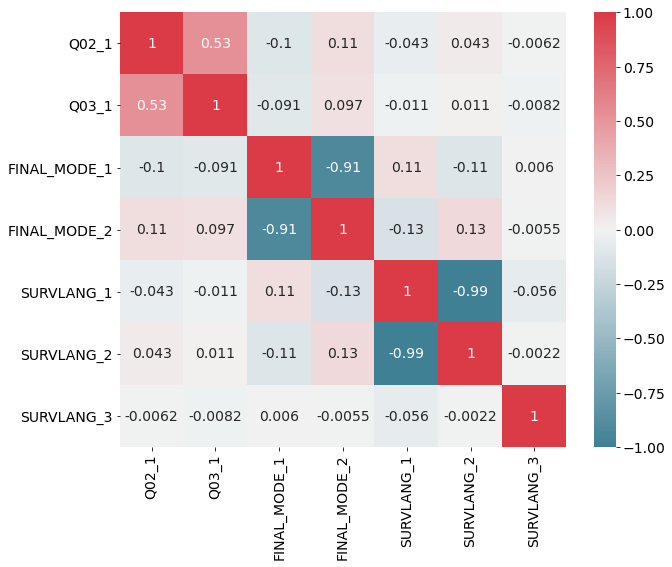

In [266]:
#there's a couple of noticeable high correlations, so I will pull those fields in to look at individually
feature_cols = ['Q02_1', 'Q03_1','FINAL_MODE_1', 'FINAL_MODE_2', 'SURVLANG_1', 'SURVLANG_2','SURVLANG_3']

Y =   patient_data['Q01_1']
X =   patient_data[feature_cols]

cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = X.corr()
print(correlations)
print(sns.heatmap(correlations, vmin=-1, vmax=1, annot=True, cmap=cmap))

There are some strong negative correlations between Final Modes 1 & 2 and Survey Language 1 & 2. These variables were derived from dummy variables, so I will drop one of the variables from each group.

In [267]:
patient_data.drop(['FINAL_MODE_2', 'SURVLANG_2'], axis = 1, inplace=True)

In [268]:
patient_data.head()

,WES_HOSPID,FINAL_STATE,FINAL_BEDSIZE,FINAL_OWNERSHIP,FINAL_TEACHING,FINAL_REGION,AGE,Q01_06,Q02_06,Q03_06,Q04_06,Q05_06,Q06_06,Q07_06,Q08_06,Q09_06,Q10_06,Q11_06,Q12_06,Q13_06,Q14_06,Q15_06,Q16_06,Q17_06,Q18_06,Q19_06,Q20_06,Q21_06,Q22_06,Q23_06,Q24_06,Q25_06,Q26A_06,Q26B_06,Q26C_06,Q26D_06,Q26E_06,Q27_06,RECORDID,RACE,FINAL_MODE,SEX,CRITICAL_HOSPITAL,ADMISSIONSOURCE,PRINCIPALREASONADMISSION,PATIENTDISCHARGEDATE,SURVLANG,Season,Year,Q01_1,Q02_1,Q03_1,Q05_1,Q06_1,Q07_1,Q08_1,Q09_1,AGE_1.0,AGE_2.0,AGE_3.0,AGE_4.0,AGE_5.0,AGE_6.0,AGE_7.0,AGE_8.0,AGE_9.0,AGE_10.0,AGE_11.0,AGE_12.0,AGE_13.0,AGE_14.0,RACE_1.0,RACE_2.0,RACE_3.0,RACE_4.0,SEX_1.0,CRITICAL_HOSPITAL_N,ADMISSIONSOURCE_1,ADMISSIONSOURCE_2,ADMISSIONSOURCE_3,ADMISSIONSOURCE_4,ADMISSIONSOURCE_5,ADMISSIONSOURCE_6,ADMISSIONSOURCE_7,ADMISSIONSOURCE_8,ADMISSIONSOURCE_9,PRINCIPALREASONADMISSION_1.0,PRINCIPALREASONADMISSION_2.0,FINAL_MODE_1,SURVLANG_1,SURVLANG_3,FINAL_STATE_Midwest_Region,FINAL_STATE_Northeast_Region,FINAL_STATE_South_Region,Season_Fall,Season_Spring,Season_Summer,Year_2005
0,1,South_Region,4,3,3,5,8,1,1,1,3,M,1,1,0,0,2,M,2,M,M,2,M,M,1,M,2,9,3,2,2,1,1,0,0,0,0,1,2,1.0,1,1.0,N,1,2,Spring 2006,1,Spring,2006,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0
1,1,South_Region,4,3,3,5,8,0,0,0,2,0,0,0,0,0,2,M,1,2,2,1,2,1,1,M,1,5,3,4,1,1,1,0,0,0,0,1,7,1.0,1,2.0,N,7,2,Spring 2006,1,Spring,2006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,1,0,0
2,1,South_Region,4,3,3,5,7,1,1,1,3,1,1,1,0,1,2,M,2,M,M,1,2,2,1,1,1,10,4,3,2,M,0,1,0,0,0,1,10,2.0,1,2.0,N,7,2,Spring 2006,1,Spring,2006,1,1,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,1,0,0
3,1,South_Region,4,3,3,5,6,1,0,0,3,1,1,1,1,0,2,M,1,3,3,2,M,M,1,1,1,9,4,4,4,1,1,0,0,0,0,1,13,1.0,1,2.0,N,7,2,Spring 2006,1,Spring,2006,1,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,1,0,0
4,1,South_Region,4,3,3,5,8,0,0,0,4,1,1,1,0,0,2,M,1,2,3,1,4,1,1,M,M,8,4,3,4,1,0,1,0,0,0,1,16,2.0,1,1.0,N,7,2,Spring 2006,1,Spring,2006,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,1,0,0


# EDA on Outcome

In [269]:
patient_data['Q01_1'].value_counts(normalize=True)*100

1    75.970948
0    24.029052
Name: Q01_1, dtype: float64

76% of patients gave top box rated responses and 24% of respondents gave undesired responses for nurse courtesy and respect.

#### Region

In [270]:
midwest = pd.crosstab(patient_data['FINAL_STATE_Midwest_Region'],patient_data['Q01_1'])
midwest

Q01_1,0,1
FINAL_STATE_Midwest_Region,,
0,40012,125125
1,5809,19744


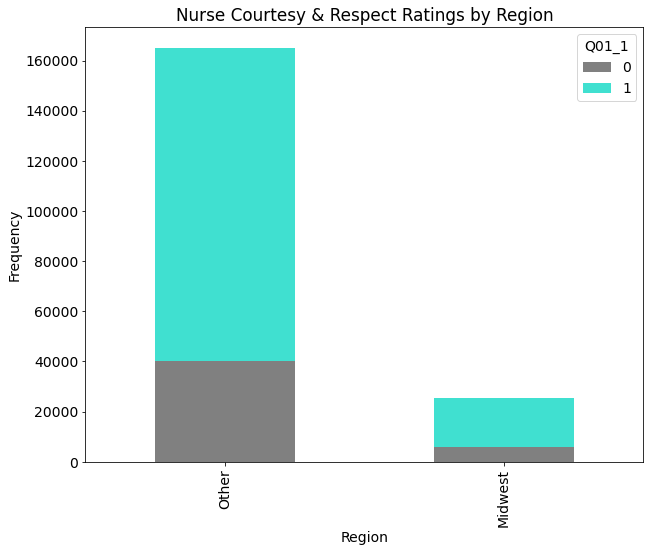

In [271]:
midwest.plot(kind='bar', stacked=True, color=['gray', 'turquoise']);
plt.title('Nurse Courtesy & Respect Ratings by Region');
positions = (0,1)
labels = ('Other','Midwest');
plt.xticks(positions, labels);
plt.xlabel('Region');
plt.ylabel('Frequency');

In [272]:
northeast = pd.crosstab(patient_data['FINAL_STATE_Northeast_Region'],patient_data['Q01_1'])
northeast

Q01_1,0,1
FINAL_STATE_Northeast_Region,,
0,42566,132433
1,3255,12436


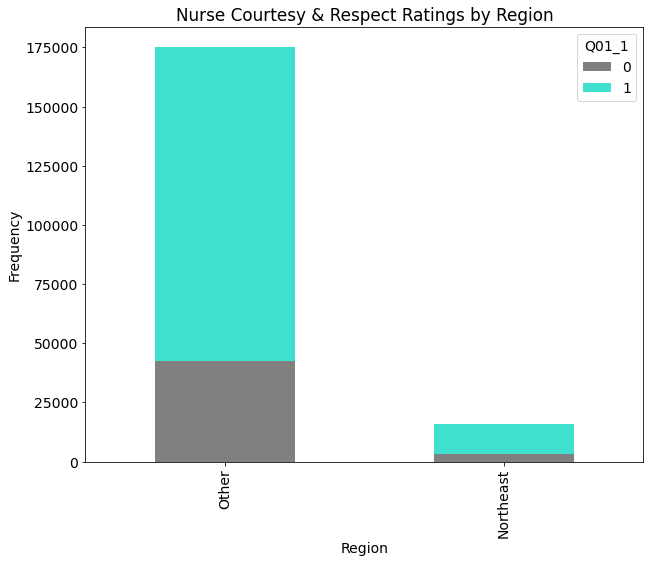

In [273]:
northeast.plot(kind='bar', stacked=True, color=['gray', 'turquoise'])
plt.title('Nurse Courtesy & Respect Ratings by Region');
positions = (0,1)
labels = ('Other','Northeast');
plt.xticks(positions, labels);
plt.xlabel('Region');
plt.ylabel('Frequency');

In [274]:
south = pd.crosstab(patient_data['FINAL_STATE_South_Region'],patient_data['Q01_1'])
south

Q01_1,0,1
FINAL_STATE_South_Region,,
0,30805,95916
1,15016,48953


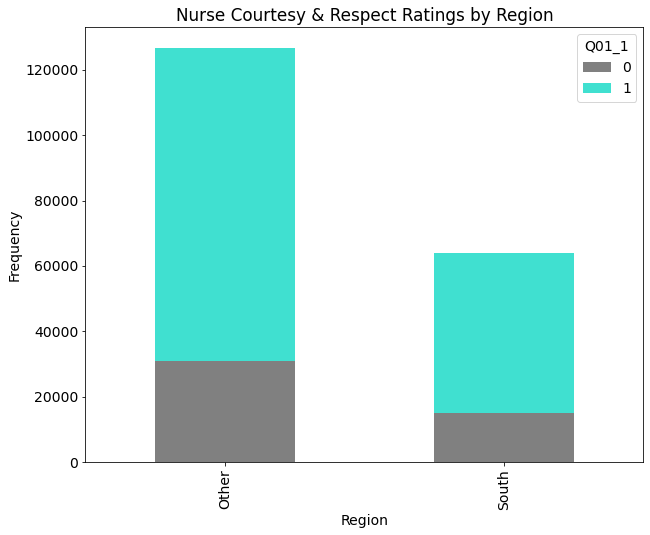

In [275]:
south.plot(kind = 'bar', stacked = True, color=['gray', 'turquoise']);
plt.title('Nurse Courtesy & Respect Ratings by Region');
positions = (0,1)
labels = ('Other','South');
plt.xticks(positions, labels);
plt.xlabel('Region');
plt.ylabel('Frequency');

Overall, there were more respondents in the south region that gave top box ratings for nurse courtesy and respect, compared to any other region. However, amongst all regions, respondents tend to give higher ratings, than lower ratings.

#### Season Discharge Date

In [276]:
fall = pd.crosstab(patient_data['Season_Fall'],patient_data['Q01_1'])

In [277]:
fall

Q01_1,0,1
Season_Fall,,
0,40781,127947
1,5040,16922


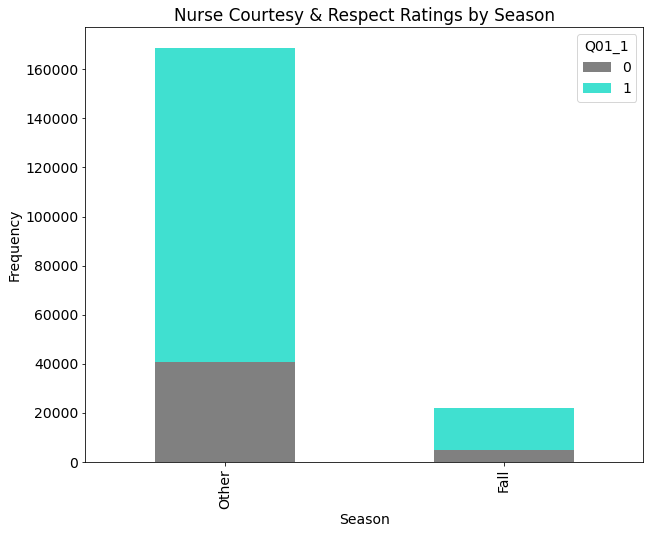

In [278]:
fall.plot(kind='bar', stacked=True, color=['gray', 'turquoise']);
plt.title('Nurse Courtesy & Respect Ratings by Season');
positions = (0,1)
labels = ('Other','Fall');
plt.xticks(positions, labels);
plt.xlabel('Season');
plt.ylabel('Frequency');

In [279]:
spring = pd.crosstab(patient_data['Season_Spring'],patient_data['Q01_1'])
spring

Q01_1,0,1
Season_Spring,,
0,34309,107760
1,11512,37109


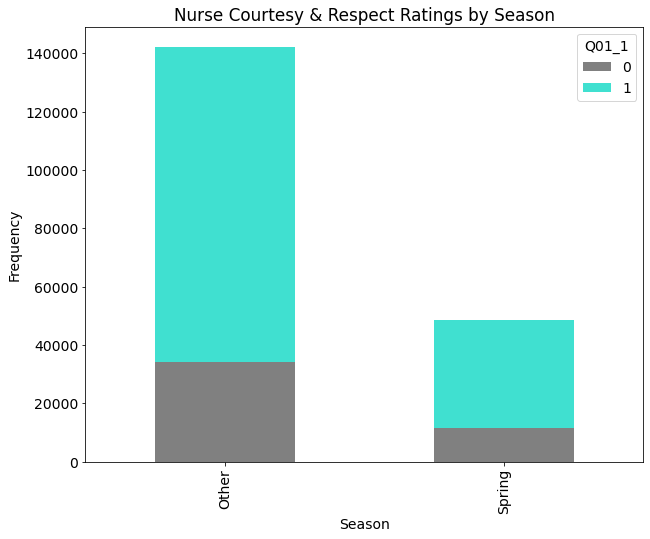

In [280]:
spring.plot(kind = 'bar', stacked = True, color=['gray', 'turquoise']);
plt.title('Nurse Courtesy & Respect Ratings by Season');
positions = (0,1)
labels = ('Other','Spring');
plt.xticks(positions, labels);
plt.xlabel('Season');
plt.ylabel('Frequency');

In [281]:
summer = pd.crosstab(patient_data['Season_Summer'],patient_data['Q01_1'])
summer

Q01_1,0,1
Season_Summer,,
0,28524,89435
1,17297,55434


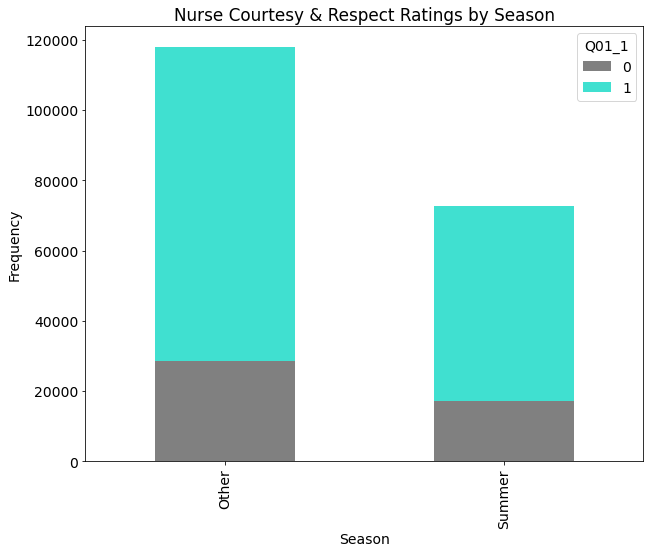

In [282]:
summer.plot(kind = 'bar', stacked= True, color=['gray', 'turquoise']);
plt.title('Nurse Courtesy & Respect Ratings by Season');
positions = (0,1)
labels = ('Other','Summer');
plt.xticks(positions, labels);
plt.xlabel('Season');
plt.ylabel('Frequency');

Higher ratings were given in the summer, than any other season, for nurse courtesy and respect.

#### Year Discharge Date

In [283]:
year = pd.crosstab(patient_data['Year_2005'],patient_data['Q01_1'])
year

Q01_1,0,1
Year_2005,,
0,42424,134936
1,3397,9933


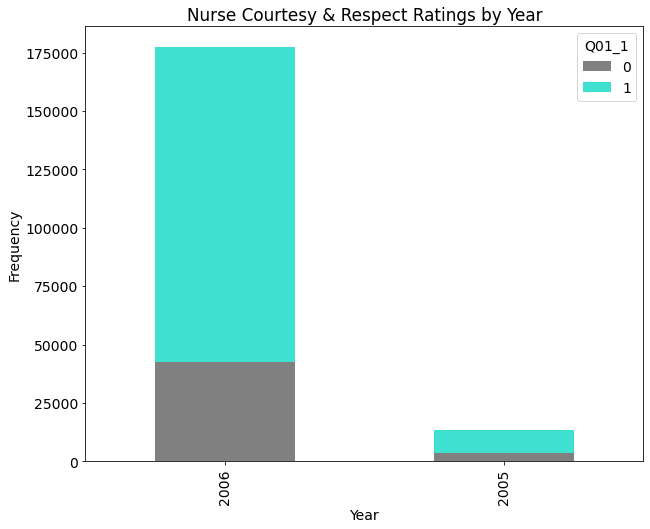

In [284]:
year.plot(kind = 'bar', stacked = True, color=['gray', 'turquoise']);
plt.title('Nurse Courtesy & Respect Ratings by Year');
positions = (0,1)
labels = ('2006','2005');
plt.xticks(positions, labels);
plt.xlabel('Year');
plt.ylabel('Frequency');

More surveys occured in 2006, than 2005. Therefore, the majority of high ratings occured in 2006, compared to 2005.

#### Critical Hospital

In [285]:
crit_hosp = pd.crosstab(patient_data['CRITICAL_HOSPITAL_N'], patient_data['Q01_1'])
crit_hosp

Q01_1,0,1
CRITICAL_HOSPITAL_N,,
0,773,4012
1,45048,140857


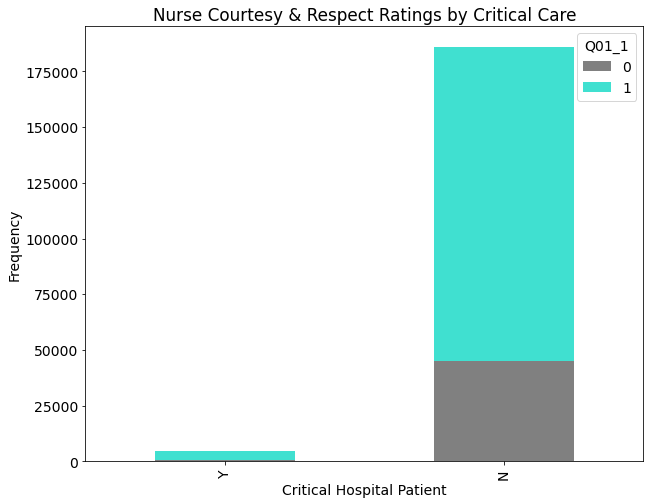

In [286]:
crit_hosp.plot(kind='bar', stacked = True, color=['gray', 'turquoise']);
plt.title('Nurse Courtesy & Respect Ratings by Critical Care');
positions = (0,1)
labels = ('Y','N');
plt.xticks(positions, labels);
plt.xlabel('Critical Hospital Patient');
plt.ylabel('Frequency');

There was a low volume of patients who needed critical care. However, even with this low volume, the majority of survey ratings were top box ratings.

#### Race

In [287]:
race_1 = pd.crosstab(patient_data['RACE_1.0'], patient_data['Q01_1'])
race_1

Q01_1,0,1
RACE_1.0,,
0,10618,33875
1,35203,110994


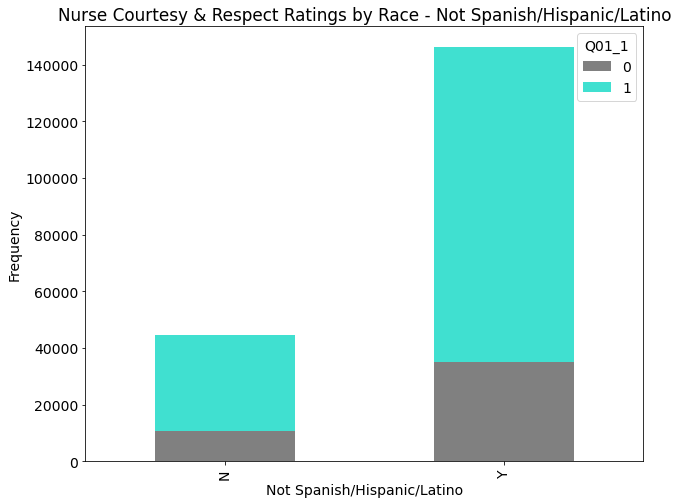

In [288]:
race_1.plot(kind='bar', stacked=True, color=['gray', 'turquoise']);
plt.title('Nurse Courtesy & Respect Ratings by Race - Not Spanish/Hispanic/Latino')
positions = (0,1)
labels = ('N','Y');
plt.xticks(positions, labels);
plt.xlabel('Not Spanish/Hispanic/Latino');
plt.ylabel('Frequency');

Respondents in this category had the highest volume of surveys, compared to any other race. Also, the majority of ratings were top box ratings for this group.

#### Age

In [289]:
age_12 = pd.crosstab(patient_data['AGE_12.0'], patient_data['Q01_1'])
age_12

Q01_1,0,1
AGE_12.0,,
0,41126,129493
1,4695,15376


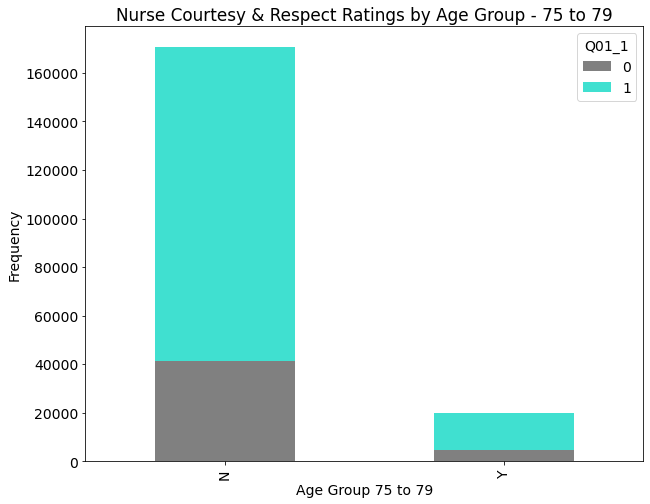

In [290]:
age_12.plot(kind = 'bar', stacked = True, color = ['gray', 'turquoise']);
plt.title('Nurse Courtesy & Respect Ratings by Age Group - 75 to 79');
positions = (0,1)
labels = ('N','Y');
plt.xticks(positions, labels);
plt.xlabel('Age Group 75 to 79');
plt.ylabel('Frequency');

Age group 75 to 79 had a high volume of top box ratings, compared to low ratings. However, compared to all other age groups, the volume of top box ratings were not nearly as significant.

#### Mode

In [291]:
mode = pd.crosstab(patient_data['FINAL_MODE_1'], patient_data['Q01_1'])
mode

Q01_1,0,1
FINAL_MODE_1,,
0,7841,34639
1,37980,110230


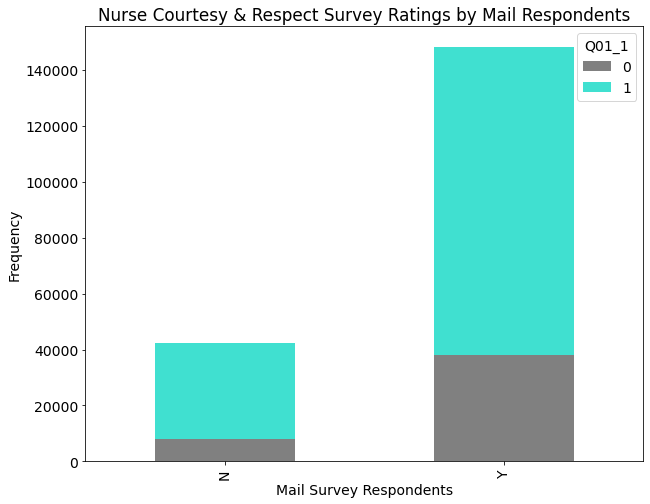

In [292]:
mode.plot(kind='bar', stacked=True, color = ['gray', 'turquoise'])
plt.title('Nurse Courtesy & Respect Survey Ratings by Mail Respondents');
positions = (0,1)
labels = ('N','Y');
plt.xticks(positions, labels);
plt.xlabel('Mail Survey Respondents');
plt.ylabel('Frequency');

#### Principal Reason Admission

In [293]:
princ_reason = pd.crosstab(patient_data['PRINCIPALREASONADMISSION_2.0'], patient_data['Q01_1'])
princ_reason

Q01_1,0,1
PRINCIPALREASONADMISSION_2.0,,
0,27614,93515
1,18207,51354


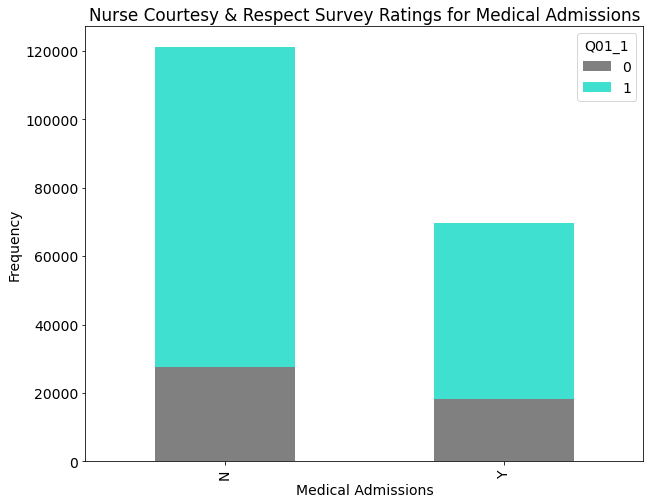

In [294]:
ax = princ_reason.plot(kind='bar', stacked=True, color = ['gray', 'turquoise']);
plt.title('Nurse Courtesy & Respect Survey Ratings for Medical Admissions');
positions = (0,1)
labels = ('N','Y');
plt.xticks(positions, labels);
plt.xlabel('Medical Admissions');
plt.ylabel('Frequency');

#### Admission Source

In [295]:
admission_source = pd.crosstab(patient_data['ADMISSIONSOURCE_1'], patient_data['Q01_1'])
admission_source

Q01_1,0,1
ADMISSIONSOURCE_1,,
0,28456,89125
1,17365,55744


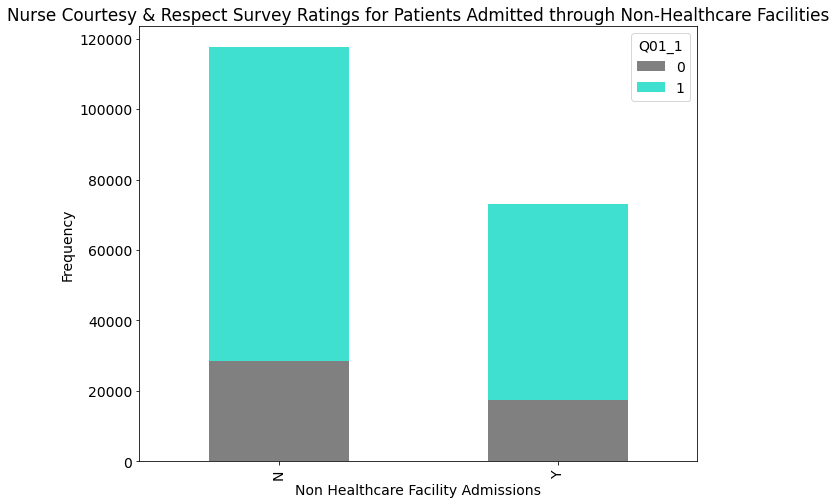

In [296]:
admission_source.plot(kind='bar', stacked=True, color = ['gray', 'turquoise']);
plt.title('Nurse Courtesy & Respect Survey Ratings for Patients Admitted through Non-Healthcare Facilities');
positions = (0,1)
labels = ('N','Y');
plt.xticks(positions, labels);
plt.xlabel('Non Healthcare Facility Admissions');
plt.ylabel('Frequency');

In [297]:
#export clean dataset
patient_data.to_csv("Hospital Patient Experience_Cleaned.csv")